In [103]:
# Import required dependencies/packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import glob 
import os 
import math
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator

#Proposal

The purpose of this project is to analyse the modes of transport in Melbourne, with a specific focus on trains, and assess the footfall in each city council area. Additionally, the analysis will incorporate Melbourne's real estate sales data to investigate if there is any correlation between higher footfall and property sale trends. 
 

Project Title : Melbourne Public Trasport Trends by passenger footfall and housing sell

Members : Talieh, Yared, Peter, Abhi

Aim : The aim of this project is to evaluate the different modes of public trasport in each city council area of Melbourne Metropolitin for period of 2018-2023 with a emphasis on metro/trains. Furthermore, the investigation will integrate data from Melbourne's real estate sales to examine any potential associations between increased foot traffic and property sale patterns. 

Data sources : Primary data source is various open source data files of Department of Transport and Planning, Goevernment of victoria. We are also analysis VISTA survey.

Shot description :





In [104]:
#Reading data from csv - Monthly Patronage footfall by mode of trasport
public_trasport_df=pd.read_csv('Resources/Monthly_public_transport_patronage_by_mode.csv')
public_trasport_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,"16,809,932","15,231,368","7,568,547","1,466,256","116,568","721,229"
1,2018,2,February,"19,554,477","16,980,925","10,487,311","1,522,981","103,197","1,118,494"
2,2018,3,March,"22,659,010","19,832,126","11,528,895","1,809,774","117,180","1,224,816"
3,2018,4,April,"20,312,040","16,919,872","9,592,750","1,684,827","107,480","946,218"
4,2018,5,May,"22,768,447","17,691,427","11,263,486","1,790,656","109,456","1,258,704"
...,...,...,...,...,...,...,...,...,...
61,2023,2,February,"12,831,622","12,894,448","8,608,284","1,424,645","77,949","1,096,006"
62,2023,3,March,"16,527,142","15,292,063","10,301,621","1,869,164","88,964","1,247,122"
63,2023,4,April,"13,288,137","12,402,173","8,124,564","1,469,224","89,335","938,444"
64,2023,5,May,"15,312,507","12,760,569","9,848,630","1,743,181","95,859","1,222,849"


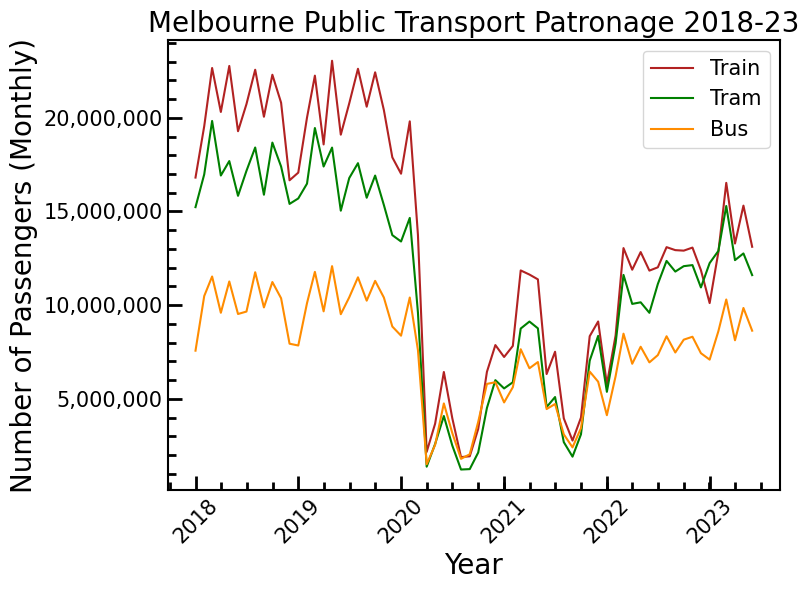

In [105]:
# Convert the string numbers with commas to integers
for column in public_trasport_df.iloc[:,3:]:
    public_trasport_df[column] = public_trasport_df[column].str.replace(',', '').astype(int)
    
#Create a combined time column
public_trasport_df["Time"]=pd.to_datetime(public_trasport_df[["Year","Month"]].assign(DAY=1))

def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

#Plotting - Only for metro Melbounre
plt.figure(figsize=(8, 6))

plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan train"],label="Train", color='firebrick')
plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan tram"],label="Tram", color='green')
plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan bus"],label="Bus", color='darkorange')

plt.title('Melbourne Public Transport Patronage 2018-23',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Passengers (Monthly)', fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

plt.xticks(rotation=45)
plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("PTV_MonthlyPassengerFootfall.png")
plt.show()

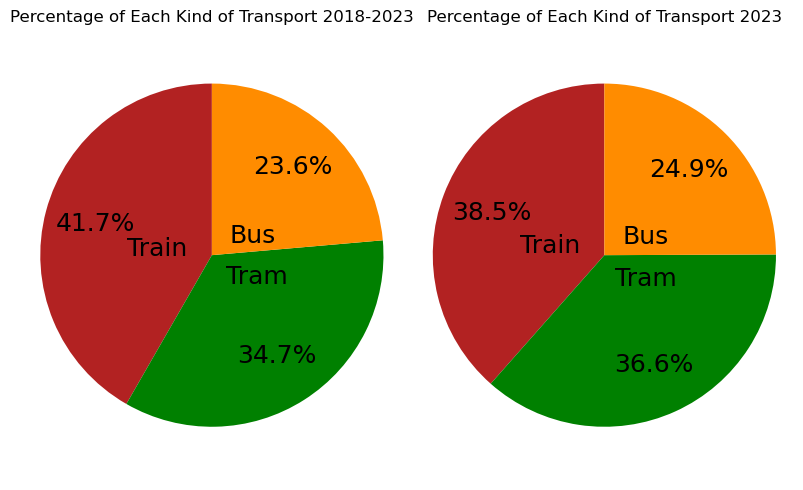

In [130]:
# Summing up the total for each transport mode

mode_total = public_trasport_df.loc[:,["Metropolitan train", "Metropolitan tram", "Metropolitan bus"]].sum()
mode_2023  = public_trasport_df.loc[public_trasport_df["Year"]==2023,["Metropolitan train", "Metropolitan tram", "Metropolitan bus"]].sum()
# Sort the dataframe in descending order
sorted_mode_total = mode_total.sort_values(ascending=False)
sorted_mode_2023 = mode_2023.sort_values(ascending=False)

# Plotting the pie chart
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
colors = ['firebrick','green', 'darkorange']
labels = ['Train','Tram', 'Bus']
ax[0].pie(sorted_mode_total, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.15,pctdistance=0.70,startangle=90,textprops=dict(size=18))
ax[1].pie(sorted_mode_2023, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.15,pctdistance=0.70,startangle=90,textprops=dict(size=18))

ax[0].set_title("Percentage of Each Kind of Transport 2018-2023")
ax[1].set_title("Percentage of Each Kind of Transport 2023")

# Adding legend to the second subplot (or you can add to the first based on preference)
#ax[1].legend(sorted_mode_total.index, title="Transport Modes", loc="lower left")

ax[0].axis('equal')  # Ensure the pie is drawn as a circle.
ax[1].axis('equal')  # Ensure the pie is drawn as a circle.

plt.tight_layout()
plt.savefig("Percentage_Public_Transport_Patronage_PieChart.png")
plt.show()

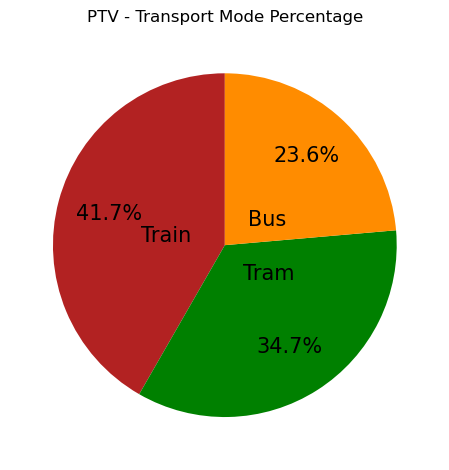

In [126]:
# Plotting the pie chart
colors = ['firebrick','green', 'darkorange']
labels = ['Train','Tram', 'Bus']
plt.pie(sorted_mode_total, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.2,pctdistance=0.70,startangle=90,textprops=dict(size=15))
plt.title('PTV - Transport Mode Percentage')
plt.tight_layout()
plt.savefig(f"PTV_Transport_Mode_Pie.png")
plt.show()

In [131]:
# Import all CSV Train files
joined_files = os.path.join("Resources/", "Train*.csv") 
#print(joined_files)
  
# List all CSV Train files
joined_list  = sorted(glob.glob(joined_files))
#print(joined_list)
  
# Concat all CSV Train files
df           = pd.concat(map(pd.read_csv, joined_list), axis = 1) 
df           = df.fillna(0)
#print(df) 

# Display the data table for preview
df.head(100)

,_id,Fin_year,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual,Pax_weekday,Pax_norm_weekday,Pax_sch_hol_weekday,...,Pax_weekday,Pax_norm_weekday,Pax_sch_hol_weekday,Pax_Saturday,Pax_Sunday,Pax_pre_AM_peak,Pax_AM_peak,Pax_interpeak,Pax_PM_peak,Pax_PM_late
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,FY18-19,19928.0,Westgarth,-37.780621,144.999233,298000.0,1000.0,1000.0,850.0,...,250,250,200,200,150,50,100,50,50,50
96,97.0,FY18-19,19929.0,Dennis,-37.779187,145.008242,389350.0,1350.0,1400.0,1150.0,...,550,600,400,400,300,50,300,100,100,50
97,98.0,FY18-19,19930.0,Fairfield,-37.779171,145.016905,616150.0,2050.0,2150.0,1800.0,...,750,800,550,450,300,50,450,150,150,50
98,99.0,FY18-19,19931.0,Alphington,-37.778394,145.031255,296900.0,1050.0,1100.0,800.0,...,1250,1350,950,900,750,50,650,250,300,50


In [132]:
# List of all columns
list(df.columns.values)

['_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_p

In [133]:
# Rename columns
df.columns = ['_idr', 'year1819', 'Stop_ID', 'Stop_name', 'Stop_lat', 'Stop_long', 'Pax_annual1819', 'Pax_weekday1819', 
              'Pax_norm_weekday1819', 'Pax_sch_hol_weekday1819', 'Pax_Saturday1819', 'Pax_Sunday1819', 'Pax_pre_AM_peak1819', 
              'Pax_AM_peak1819', 'Pax_interpeak1819', 'Pax_PM_peak1819', 'Pax_PM_late1819',
              '_idr', 'year1920', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual1920', 'Pax_weekday1920', 
              'Pax_norm_weekday1920', 'Pax_sch_hol_weekday1920', 'Pax_Saturday1920', 'Pax_Sunday1920', 'Pax_pre_AM_peak1920', 
              'Pax_AM_peak1920', 'Pax_interpeak1920', 'Pax_PM_peak1920', 'Pax_PM_late1920',
              '_idr', 'year2021', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2021', 'Pax_weekday2021', 
              'Pax_norm_weekday2021', 'Pax_sch_hol_weekday2021', 'Pax_Saturday2021', 'Pax_Sunday2021', 'Pax_pre_AM_peak2021', 
              'Pax_AM_peak2021', 'Pax_interpeak2021', 'Pax_PM_peak2021', 'Pax_PM_late2021',
              '_idr', 'year2122', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2122', 'Pax_weekday2122', 
              'Pax_norm_weekday2122', 'Pax_sch_hol_weekday2122', 'Pax_Saturday2122', 'Pax_Sunday2122', 'Pax_pre_AM_peak2122', 
              'Pax_AM_peak2122', 'Pax_interpeak2122', 'Pax_PM_peak2122', 'Pax_PM_late2122',
              '_idr', 'year2223', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2223', 'Pax_weekday2223', 
              'Pax_norm_weekday2223', 'Pax_sch_hol_weekday2223', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_pre_AM_peak2223', 
              'Pax_AM_peak2223', 'Pax_interpeak2223', 'Pax_PM_peak2223', 'Pax_PM_late2223']

In [134]:
# Drop duplicate columns
duplicate_cols  = df.columns[df.columns.duplicated()]
df.drop(columns = duplicate_cols, inplace=True)
list(df.columns.values)

['year1819',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax

In [145]:
# Define function to calculate distance from flinders street station to respective stations using lat & long
# Coordinates for flinders street: Lat : -37.81830513

def Dist(lat1, lon1, lat2, lon2):
    R = 6371                           # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c                          # Distance in km
    return d

In [146]:
flinders_lat    = df.loc[(df['Stop_name'] == 'Flinders Street'), 'Stop_lat']
flinders_long   = df.loc[(df['Stop_name'] == 'Flinders Street'), 'Stop_long']
print(flinders_lat, flinders_long)

213   -37.818305
Name: Stop_lat, dtype: float64 213    144.966964
Name: Stop_long, dtype: float64


In [147]:
# Calculate various values
df['Distance']      = df.apply(lambda row: Dist(row['Stop_lat'], row['Stop_long'], flinders_lat, flinders_long), axis=1)
df['TotalAnnual']   = df['Pax_annual1819']+df['Pax_annual1920']+df['Pax_annual2021']+df['Pax_annual2122']+df['Pax_annual2223']
df['TotalAMPeak']   = df['Pax_AM_peak1819']+df['Pax_AM_peak1920']+df['Pax_AM_peak2021']+df['Pax_AM_peak2122']+df['Pax_AM_peak2223']
df['TotalPMPeak']   = df['Pax_PM_peak1819']+df['Pax_PM_peak1920']+df['Pax_PM_peak2021']+df['Pax_PM_peak2122']+df['Pax_PM_peak2223']
df['TotalWeekday']  = df['Pax_norm_weekday1819']+df['Pax_norm_weekday1920']+df['Pax_norm_weekday2021']+df['Pax_norm_weekday2122']+df['Pax_norm_weekday2223']
df['TotalWeekend']  = df['Pax_Saturday1819']+df['Pax_Saturday1920']+df['Pax_Saturday2021']+df['Pax_Saturday2122']+df['Pax_Saturday2223']+df['Pax_Sunday1819']+df['Pax_Sunday1920']+df['Pax_Sunday2021']+df['Pax_Sunday2122']+df['Pax_Sunday2223']
df['TotalOffpeak']  = df['Pax_pre_AM_peak1819']+df['Pax_pre_AM_peak1920']+df['Pax_pre_AM_peak2021']+df['Pax_pre_AM_peak2122']+df['Pax_pre_AM_peak2223']+df['Pax_interpeak1819']+df['Pax_interpeak1920']+df['Pax_interpeak2021']+df['Pax_interpeak2122']+df['Pax_interpeak2223']++df['Pax_PM_late1819']+df['Pax_PM_late1920']+df['Pax_PM_late2021']+df['Pax_PM_late2122']+df['Pax_PM_late2223']

df['AnnualPerIncrease']     = (df['Pax_annual2223']/df['Pax_annual1819'])*100
df['TotalAMPeakIncrease']   = (df['Pax_AM_peak2223']/df['Pax_AM_peak1819'])*100
df['TotalPMPeakIncrease']   = (df['Pax_PM_peak2223']/df['Pax_PM_peak2223'])*100
df['TotalOffPeakIncrease']  = ( (df['Pax_pre_AM_peak1819']+df['Pax_interpeak1819']+df['Pax_PM_late1819']) / (df['Pax_pre_AM_peak2223']+df['Pax_interpeak2223']+df['Pax_PM_late2223']) )*100
list(df.columns.values)

['year1819',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax

In [148]:
# Import CSV files for Melbounre's metro stations
ds           = pd.read_csv("Resources/StationList.csv")

# Merge CSV files for metro stations and passenger footfall
dp           = pd.merge(ds, df, how="right", on=["Stop_name"])
#print(dp)
dp           = dp.dropna()
#print(dp)
list(dp.columns.values)

['Zone',
 'Line name ',
 'Stop_name',
 'City council',
 'year1819',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pr

In [149]:
# Reorganise sequence of columns
dp = dp[[
 'Stop_name',
 'Line name ',
 'City council',
 'Zone',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Distance',
 'TotalAnnual',
 'TotalAMPeak',
 'TotalPMPeak',
 'TotalWeekday',
 'TotalWeekend',
 'TotalOffpeak',
 'AnnualPerIncrease',
 'TotalAMPeakIncrease',
 'TotalPMPeakIncrease',
 'TotalOffPeakIncrease',
 'year1819',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax_interpeak2122',
 'Pax_PM_peak2122',
 'Pax_PM_late2122',
 'year2223',
 'Pax_annual2223',
 'Pax_weekday2223',
 'Pax_norm_weekday2223',
 'Pax_sch_hol_weekday2223',
 'Pax_Saturday2223',
 'Pax_Sunday2223',
 'Pax_pre_AM_peak2223',
 'Pax_AM_peak2223',
 'Pax_interpeak2223',
 'Pax_PM_peak2223',
 'Pax_PM_late2223'
 ]]

In [150]:
# Oragnise dataframe as per annual passenger footfall and save csv file
dp  = dp.sort_values(by='TotalAnnual', ascending=False)
dp.to_csv('MetroFootfall.csv')

In [151]:
# Create group of metro stations by council areas
dm = dp.groupby(["City council"])
dm.count().head(50)

,Stop_name,Line name,Zone,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
City council,,,,,,,,,,,,,,,,,,,,,
Banyule C,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Bayside C,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Boroondara C,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Brimbank C,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Cardinia S,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Casey C,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Darebin C,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Frankston C,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Glen Eira C,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [254]:
#Create a summary table

Mean_C         = dm[["Distance", 'Stop_lat', 'Stop_long']].mean()
Sum_C          = dm[['TotalAnnual', 'TotalAMPeak', 'TotalPMPeak', 'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 
                    "Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
                    'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
                    'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
                    'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819']].sum()

Summary        = pd.merge(Mean_C, Sum_C, how="left", on=["City council"])

Summary["TotalIncrease(%)"]      = (Summary["Pax_annual2223"]/Summary["Pax_annual1819"])*100
Summary["WeekdayIncrease(%)"]    = (Summary["Pax_norm_weekday2223"]/Summary["Pax_norm_weekday1819"])*100
Summary["AMIncrease(%)"]         = (Summary["Pax_AM_peak2223"]/Summary["Pax_AM_peak1819"])*100
Summary["PMIncrease(%)"]         = (Summary["Pax_PM_peak2223"]/Summary["Pax_PM_peak1819"])*100
Summary["OffPeakIncrease(%)"]    = ( (Summary['Pax_pre_AM_peak2223']+Summary['Pax_interpeak2223']+Summary['Pax_PM_late2223']) 
                                    / (Summary['Pax_pre_AM_peak1819']+Summary['Pax_interpeak1819']+Summary['Pax_PM_late1819']) )*100
Summary["WeekendIncrease(%)"] = ( (Summary['Pax_Saturday2223']+Summary['Pax_Sunday2223']) 
                                    / (Summary['Pax_Saturday1819']+Summary['Pax_Sunday1819']) )*100

Summary.drop(["Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
              'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
              'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
              'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819'], axis=1, inplace=True)

print(Summary.sort_values(['TotalAnnual'], ascending=False))

                           Distance   Stop_lat   Stop_long  TotalAnnual  \
City council                                                              
Melbourne C                2.571549 -37.811022  144.956476  199105700.0   
Whittlesea C              21.002612 -37.645334  145.059864   40508650.0   
Yarra C                    3.099026 -37.808771  144.994970   38622700.0   
Monash C                  15.748572 -37.891943  145.117603   33914850.0   
Boroondara C               9.023778 -37.835384  145.066073   26341800.0   
Glen Eira C               10.860237 -37.897642  145.035702   24589800.0   
Hume C                    21.702833 -37.643927  144.879278   23938450.0   
Maribyrnong C              7.113931 -37.804917  144.888091   23513450.0   
Stonnington C              7.831031 -37.856243  145.041290   23360800.0   
Darebin C                  8.325017 -37.751181  145.005097   22618650.0   
Bayside C                 14.183177 -37.938111  145.019598   19655550.0   
Brimbank C               

In [256]:
Summary.to_csv("Resources/Summary.csv")

#Create a summary table

Mean_C         = dm["Distance"].mean()
Sum_C          = dm[['TotalAnnual', 'TotalAMPeak', 'TotalPMPeak', 'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 
                    "Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
                    'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
                    'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
                    'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819']].sum()

Summary        = pd.merge(Mean_C, Sum_C, how="left", on=["City council"])

Summary["TotalIncrease(%)"]      = (Summary["Pax_annual2223"]/Summary["Pax_annual1819"])*100
Summary["WeekdayIncrease(%)"]    = (Summary["Pax_norm_weekday2223"]/Summary["Pax_norm_weekday1819"])*100
Summary["AMIncrease(%)"]         = (Summary["Pax_AM_peak2223"]/Summary["Pax_AM_peak1819"])*100
Summary["PMIncrease(%)"]         = (Summary["Pax_PM_peak2223"]/Summary["Pax_PM_peak1819"])*100
Summary["OffPeakIncrease(%)"]    = ( (Summary['Pax_pre_AM_peak2223']+Summary['Pax_interpeak2223']+Summary['Pax_PM_late2223']) 
                                    / (Summary['Pax_pre_AM_peak1819']+Summary['Pax_interpeak1819']+Summary['Pax_PM_late1819']) )*100
Summary["WeekendIncrease(%)"] = ( (Summary['Pax_Saturday2223']+Summary['Pax_Sunday2223']) 
                                    / (Summary['Pax_Saturday1819']+Summary['Pax_Sunday1819']) )*100

Summary.drop(["Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
              'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
              'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
              'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819'], axis=1, inplace=True)

print(Summary.sort_values(['TotalAnnual'], ascending=False))

In [62]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val > 90 else 'black'
    return 'color: % s' % color
Summary.style.applymap(color_negative_red)

,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
City council,,,,,,,,,,,,,
Banyule C,13.392110,16823150.000000,26600.000000,13450.000000,59200.000000,49850.000000,20300.000000,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
Bayside C,14.183177,19655550.000000,28450.000000,13250.000000,63400.000000,70800.000000,21850.000000,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
Boroondara C,9.023778,26341800.000000,31350.000000,33400.000000,94000.000000,74000.000000,32300.000000,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
Brimbank C,16.208247,19624650.000000,29200.000000,10750.000000,66650.000000,60750.000000,26700.000000,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
Cardinia S,48.815247,5640200.000000,9100.000000,3100.000000,20550.000000,14150.000000,8950.000000,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296
Casey C,38.423380,14640650.000000,21750.000000,8000.000000,52900.000000,38050.000000,23300.000000,90.475990,83.763838,77.868852,109.375000,84.482759,127.083333
Darebin C,8.325017,22618650.000000,33100.000000,16400.000000,75850.000000,76200.000000,28000.000000,74.413574,71.428571,60.089686,94.444444,76.100629,87.710843
Frankston C,37.594584,6626350.000000,6950.000000,4300.000000,21100.000000,26250.000000,11050.000000,73.995852,70.229008,57.446809,84.000000,73.846154,90.140845
Glen Eira C,10.860237,24589800.000000,31150.000000,21350.000000,82600.000000,91750.000000,30350.000000,61.875909,61.489699,59.574468,68.518519,58.649789,68.815592


In [52]:
Summary.to_csv('Summary.csv')

In [63]:
dss=pd.read_csv('Summary.csv')

In [83]:
dss1 = dss.sort_values(['Distance'], ascending=True)
print(dss1)

AttributeError: 'DataFrame' object has no attribute 'hide_index'

In [80]:
dss2 = dss1["City council"]

In [75]:
dss2.style.applymap(color_negative_red)

AttributeError: 'Series' object has no attribute 'style'

<Axes: >

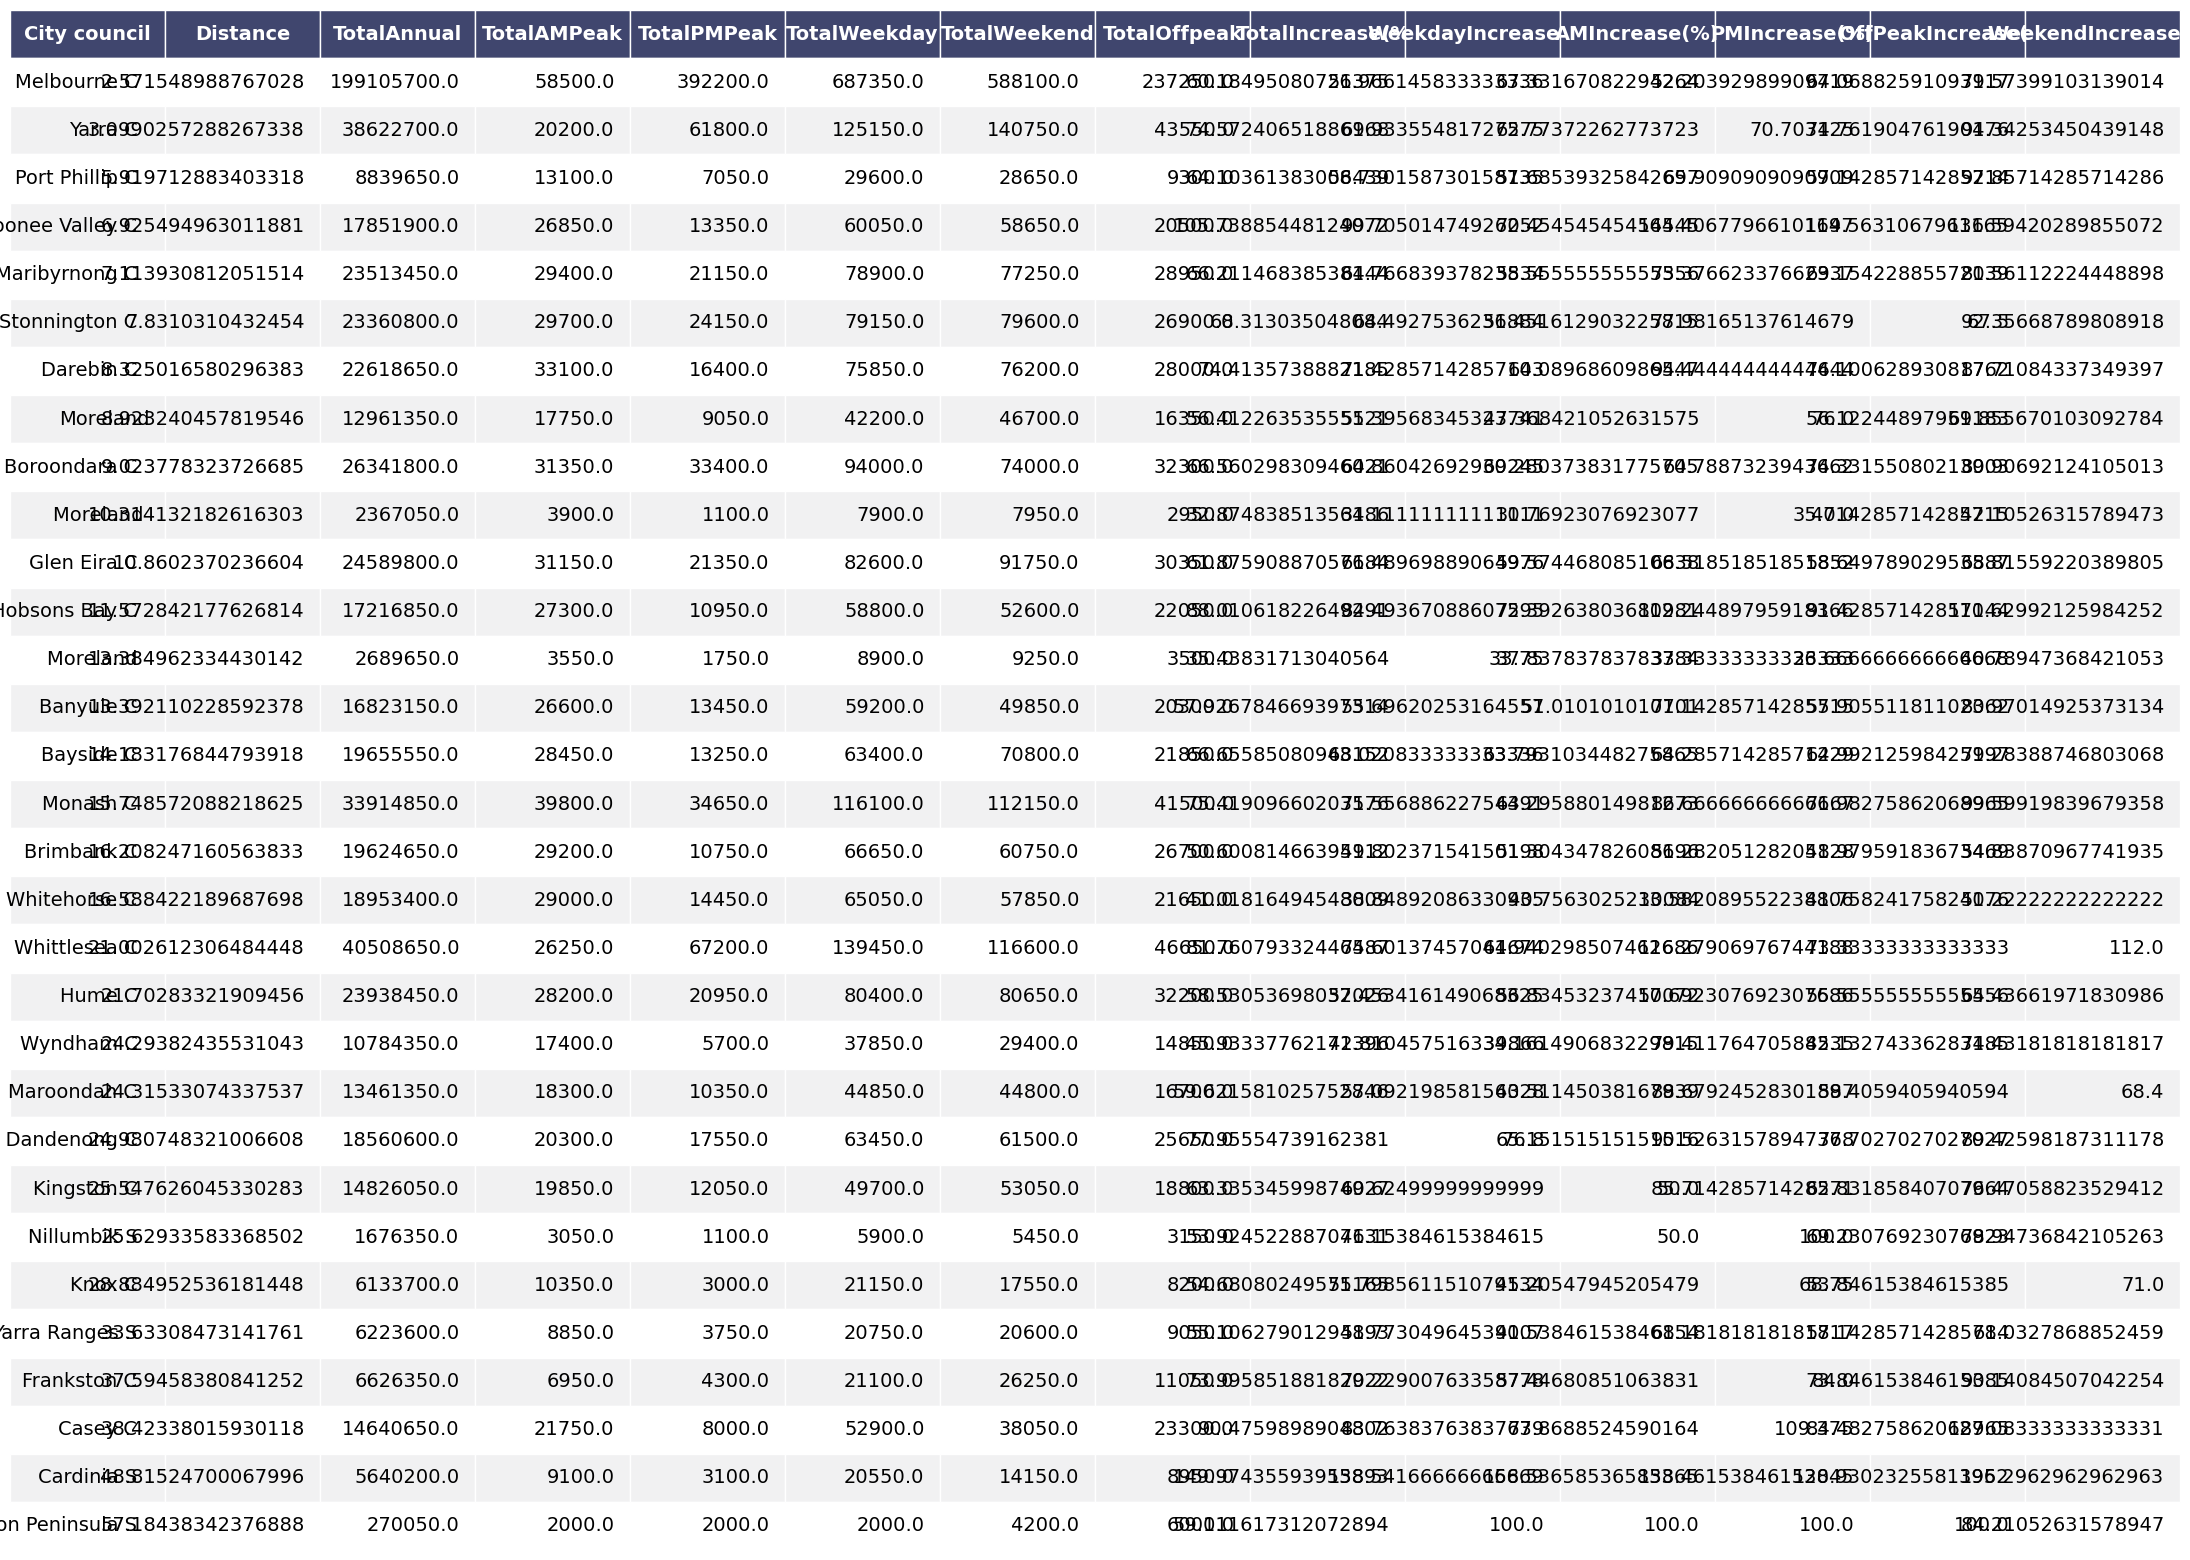

In [82]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(dss1, header_columns=0, col_width=2.0)

In [74]:
from tabulate import tabulate
print(tabulate(dss1, headers = 'keys', tablefmt = 'psql'))

+----+------------------------+------------+------------------+---------------+---------------+----------------+----------------+----------------+--------------------+----------------------+-----------------+-----------------+----------------------+----------------------+
|    | City council           |   Distance |      TotalAnnual |   TotalAMPeak |   TotalPMPeak |   TotalWeekday |   TotalWeekend |   TotalOffpeak |   TotalIncrease(%) |   WeekdayIncrease(%) |   AMIncrease(%) |   PMIncrease(%) |   OffPeakIncrease(%) |   WeekendIncrease(%) |
|----+------------------------+------------+------------------+---------------+---------------+----------------+----------------+----------------+--------------------+----------------------+-----------------+-----------------+----------------------+----------------------|
| 16 | Melbourne C            |    2.57155 |      1.99106e+08 |         58500 |        392200 |         687350 |         588100 |         237250 |            60.185  |              

conda install -c pyviz geoviews

In [155]:
 # Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

conda install selenium

conda install -c conda-forge firefox geckodriver

In [160]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m1 = df.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=df["TotalWeekday"]/150, cmap=cm, color=df["TotalWeekday"]/150, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m1
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [180]:
Summary = pd.read_csv('Summary.csv')

In [181]:
Summary.head()

,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
2,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
4,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296


In [188]:
print(Summary["City council"])

0                  Banyule C  
1                  Bayside C  
2               Boroondara C  
3                 Brimbank C  
4                 Cardinia S  
5                    Casey C  
6                  Darebin C  
7                Frankston C  
8                Glen Eira C  
9        Greater Dandenong C  
10             Hobsons Bay C  
11                    Hume C  
12                Kingston C  
13                    Knox C  
14             Maribyrnong C  
15               Maroondah C  
16               Melbourne C  
17                 Merry-bek C
18                Merry-bek C 
19               Merry-bek C  
20                  Monash C  
21           Moonee Valley C  
22    Mornington Peninsula S  
23               Nillumbik S  
24            Port Phillip C  
25             Stonnington C  
26              Whitehorse C  
27              Whittlesea C  
28                 Wyndham C  
29                   Yarra C  
30            Yarra Ranges S  
Name: City council, dtype: object


In [227]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m2 = Summary.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Summary["TotalWeekday"]/100, cmap=cm, color=Summary["TotalWeekday"]/100, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m2
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [229]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m2 = Summary.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Summary["TotalAnnual"]/30000, cmap=cm, color=Summary["TotalAnnual"]/150, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m2
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [231]:
#Loading house data from csv
house_df = pd.read_csv("Resources/Year_SummaryV2021.csv", encoding='ISO-8859-1')
house_df

,Melbourne Metropolitan Area,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Residential price statistics 1992 to 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,House Median,NaN,NaN,NaN,NaN,NaN,Unit/Apartment Median,NaN,NaN,NaN,NaN,Vacant House Block Median,NaN,NaN,NaN,NaN
2,NaN,NaN,Houses,NaN,NaN,NaN,Units/Apartments,NaN,NaN,NaN,NaN,Vacant House Blocks,NaN,NaN,NaN,NaN
3,Year,No. of Sales,Median Price,NaN,Mean Price,NaN,No. of Sales,Median Price,NaN,Mean Price,NaN,No. of Sales,Median Price,NaN,Mean Price,NaN
4,1992,"41,212","125,000",NaN,"150,106",NaN,"15,130","110,000",NaN,"133,910",NaN,"12,924","45,000",NaN,"52,976",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Industrial Total,10,NaN,NaN,NaN,NaN,NaN,Industrial Total Prices,NaN,NaN,NaN,"$1,764,000",NaN,NaN,NaN,NaN
9191,"National Parks, etc Total",1,NaN,NaN,NaN,NaN,NaN,"National Parks, etc Total Prices",NaN,NaN,NaN,"$111,500",NaN,NaN,NaN,NaN
9192,Primary Production Total,33,NaN,NaN,NaN,NaN,NaN,Primary Production Total Prices,NaN,NaN,NaN,"$41,398,067",NaN,NaN,NaN,NaN
9193,Residential Total,231,NaN,NaN,NaN,NaN,NaN,Residential Total Prices,NaN,NaN,NaN,"$32,265,245",NaN,NaN,NaN,NaN


In [232]:
house_df.columns

Index(['Melbourne Metropolitan Area', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [233]:
# Dropping columns not needed
house_df=house_df.drop(["Unnamed: 3","Unnamed: 5","Unnamed: 8","Unnamed: 10","Unnamed: 3","Unnamed: 8","Unnamed: 10","Unnamed: 13","Unnamed: 15"], axis=1)
house_df

,Melbourne Metropolitan Area,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 14
0,Residential price statistics 1992 to 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,House Median,NaN,NaN,NaN,Unit/Apartment Median,NaN,NaN,Vacant House Block Median,NaN,NaN
2,NaN,NaN,Houses,NaN,Units/Apartments,NaN,NaN,Vacant House Blocks,NaN,NaN
3,Year,No. of Sales,Median Price,Mean Price,No. of Sales,Median Price,Mean Price,No. of Sales,Median Price,Mean Price
4,1992,"41,212","125,000","150,106","15,130","110,000","133,910","12,924","45,000","52,976"
...,...,...,...,...,...,...,...,...,...,...
9190,Industrial Total,10,NaN,NaN,NaN,Industrial Total Prices,NaN,"$1,764,000",NaN,NaN
9191,"National Parks, etc Total",1,NaN,NaN,NaN,"National Parks, etc Total Prices",NaN,"$111,500",NaN,NaN
9192,Primary Production Total,33,NaN,NaN,NaN,Primary Production Total Prices,NaN,"$41,398,067",NaN,NaN
9193,Residential Total,231,NaN,NaN,NaN,Residential Total Prices,NaN,"$32,265,245",NaN,NaN


In [236]:
#Rename Columns
# Step 1: Create new headers
#new_headers = ["Col1", "House Number of Sales","House Median Price","House Mean Price","Unit/Apartment Number of Sales","Unit/Apartment Median Price","Unit/Apartment Mean Price", "Vacant House Number of Sales","Vacant House Median Price","Vacant House Mean Price"]

house_df.columns = ["Col1", "House Number of Sales","House Median Price","House Mean Price",
                    "Unit/Apartment Number of Sales","Unit/Apartment Median Price","Unit/Apartment Mean Price",
                    "Vacant House Number of Sales","Vacant House Median Price","Vacant House Mean Price"]
house_df.columns

Index(['Col1', 'House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price'],
      dtype='object')

In [237]:
house_df["Col1"].unique()

array(['Residential price statistics 1992 to 2022', 'House Median', nan,
       'Year', '1992 ', '1993 ', '1994 ', '1995 ', '1996 ', '1997 ',
       '1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ',
       '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ',
       '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ',
       '2019 ', '2020 ', '2021 ', '2022 ',
       'Statistics for 2022 are based on a small number of sales and are preliminary only.',
       'MELBOURNE METROPOLITAN AREA',
       'Analysis of property sales for 2021', 'Land Use', 'Commercial',
       'Advertising Sign Uns', 'Amusement Parks etc.', 'Bank',
       'Bed and Breakfast', 'Bottle Shop/Licensed', 'Brothel', 'Caf\x8e',
       'Car Wash', 'CarPark Ð OpenAir', 'CarPark Ð UnderCover',
       'Cinema Complex', 'Com Land (Struct 0)', 'ConferenceConvention',
       'Convenience/FastFood', 'Crematorium/Funeral', 'Dental Clinic',
       'Dev Site', 'Display Yard', 'Drive-in', 'Fuel Outle

In [238]:
# putting all data of rows in first column into a list
rows = house_df["Col1"].unique().tolist()
rows

['Residential price statistics 1992 to 2022',
 'House Median',
 nan,
 'Year',
 '1992 ',
 '1993 ',
 '1994 ',
 '1995 ',
 '1996 ',
 '1997 ',
 '1998 ',
 '1999 ',
 '2000 ',
 '2001 ',
 '2002 ',
 '2003 ',
 '2004 ',
 '2005 ',
 '2006 ',
 '2007 ',
 '2008 ',
 '2009 ',
 '2010 ',
 '2011 ',
 '2012 ',
 '2013 ',
 '2014 ',
 '2015 ',
 '2016 ',
 '2017 ',
 '2018 ',
 '2019 ',
 '2020 ',
 '2021 ',
 '2022 ',
 'Statistics for 2022 are based on a small number of sales and are preliminary only.',
 'MELBOURNE METROPOLITAN AREA',
 'Analysis of property sales for 2021',
 'Land Use',
 'Commercial',
 'Advertising Sign Uns',
 'Amusement Parks etc.',
 'Bank',
 'Bed and Breakfast',
 'Bottle Shop/Licensed',
 'Brothel',
 'Caf\x8e',
 'Car Wash',
 'CarPark Ð OpenAir',
 'CarPark Ð UnderCover',
 'Cinema Complex',
 'Com Land (Struct 0)',
 'ConferenceConvention',
 'Convenience/FastFood',
 'Crematorium/Funeral',
 'Dental Clinic',
 'Dev Site',
 'Display Yard',
 'Drive-in',
 'Fuel Outlet/Garage',
 'Ground Level Parking',
 'Health 

In [239]:
rows_council = [item for item in rows if isinstance(item, str) and ("Shire" in item or "City" in item or "Merri-Bec" in item or "Borough of Queenscliffe" in item)]

rows_council

['Alpine Shire',
 'Ararat Rural City',
 'Ballarat City',
 'Banyule City',
 'Bass Coast Shire',
 'Baw Baw Shire',
 'Bayside City',
 'Benalla Rural City',
 'Greater Bendigo City',
 'Boroondara City',
 'Brimbank City',
 'Buloke Shire',
 'Campaspe Shire',
 'Cardina Shire',
 'Casey City',
 'Central Goldfields Shire',
 'Colac Otway Shire',
 'Corangamite Shire',
 'Greater Dandenong City',
 'Darebin City',
 'East Gippsland Shire',
 'Frankston City',
 'Gannawarra Shire',
 'Greater Geelong City',
 'Glen Eira City',
 'Glenelg Shire',
 'Golden Plains Shire',
 'Hepburn Shire',
 'Hindmarsh Shire',
 'Hobsons Bay City',
 'Horsham Rural City',
 'Hume City',
 'Indigo Shire',
 'Kingston City',
 'Knox City',
 'Latrobe City',
 'Loddon Shire',
 'Macedon Ranges Shire',
 'Manningham City',
 'Mansfield Shire',
 'Maribyrnong City',
 'Maroondah City',
 'Melbourne City',
 'Melton City',
 'Mildura Rural City',
 'Mitchell Shire',
 'Moira Shire',
 'Monash City',
 'Moonee Valley City',
 'Moorabool Shire',
 'Moreland 

In [240]:
years        =['1992 ','1993 ','1994 ', '1995 ', '1996 ', '1997 ','1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ','2017 ','2018 ','2019 ','2020 ','2021 ','2022 ']
rows_to_keep =rows_council+years
rows_to_keep

['Alpine Shire',
 'Ararat Rural City',
 'Ballarat City',
 'Banyule City',
 'Bass Coast Shire',
 'Baw Baw Shire',
 'Bayside City',
 'Benalla Rural City',
 'Greater Bendigo City',
 'Boroondara City',
 'Brimbank City',
 'Buloke Shire',
 'Campaspe Shire',
 'Cardina Shire',
 'Casey City',
 'Central Goldfields Shire',
 'Colac Otway Shire',
 'Corangamite Shire',
 'Greater Dandenong City',
 'Darebin City',
 'East Gippsland Shire',
 'Frankston City',
 'Gannawarra Shire',
 'Greater Geelong City',
 'Glen Eira City',
 'Glenelg Shire',
 'Golden Plains Shire',
 'Hepburn Shire',
 'Hindmarsh Shire',
 'Hobsons Bay City',
 'Horsham Rural City',
 'Hume City',
 'Indigo Shire',
 'Kingston City',
 'Knox City',
 'Latrobe City',
 'Loddon Shire',
 'Macedon Ranges Shire',
 'Manningham City',
 'Mansfield Shire',
 'Maribyrnong City',
 'Maroondah City',
 'Melbourne City',
 'Melton City',
 'Mildura Rural City',
 'Mitchell Shire',
 'Moira Shire',
 'Monash City',
 'Moonee Valley City',
 'Moorabool Shire',
 'Moreland 

In [241]:
#filtering on rows that we need(years and council data
filtered_house_df=house_df[house_df["Col1"].isin(rows_to_keep) ]
# Making a csv file to have a look at the results
#filtered_house_df.to_csv('filtered-house.csv')

# Based on the csv file there is no need to first 93 rows as there is data for Melbourne and victoria ...
filtered_house_df=filtered_house_df.iloc[93:,:]
filtered_house_df.head(100)

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price
914,Alpine Shire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372"
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812"
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935"
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773"
...,...,...,...,...,...,...,...,...,...,...
1120,2020,"2,142","440,000","488,502",455,"315,000","327,217","1,876","194,900","202,109"
1121,2021,"2,474","530,000","588,140",486,"360,000","379,506","1,100","237,750","246,954"
1122,2022,413,"587,000","642,952",94,"416,000","427,706",81,"315,000","314,990"
1125,Ballarat City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
# in Col1 there is year data and data for council name. we want to get the council names and assign them to a new column.
rows_council
new_col = []

prev_content = None
for content in filtered_house_df['Col1']:
    if content in rows_council:
        prev_content = content
        new_col.append(content)
    else:
        new_col.append(prev_content)

filtered_house_df['new_column'] = new_col
filtered_house_df
# Making a csv file to have a look at the results
#filtered_house_df.to_csv('filtered-house-2.csv')

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
914,Alpine Shire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alpine Shire
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372",Alpine Shire
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812",Alpine Shire
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935",Alpine Shire
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773",Alpine Shire
...,...,...,...,...,...,...,...,...,...,...,...
9144,2019,126,"106,500","119,233",4,"122,000","131,000",29,"16,300","27,320",Yarriambiack Shire
9145,2020,153,"125,000","135,927",3,"175,000","177,000",27,"24,000","24,738",Yarriambiack Shire
9146,2021,159,"156,000","165,959",1,"300,000","300,000",36,"25,500","37,163",Yarriambiack Shire
9147,2022,32,"170,500","203,921",0,0,0,12,"33,750","36,833",Yarriambiack Shire


In [243]:
# Based on the csv file made in previus part, there are NaN in filtered_house_df that we want to remove them.
filtered_house_df.dropna(how='any', inplace=True)
filtered_house_df.head(5)

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372",Alpine Shire
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812",Alpine Shire
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935",Alpine Shire
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773",Alpine Shire
923,1996,163,"85,000","101,134",45,"98,000","513,244",77,"40,000","58,349",Alpine Shire


In [244]:
for column in filtered_house_df.iloc[:, 1:10].columns:
    filtered_house_df[column] = filtered_house_df[column].str.replace(",", "").str.strip().astype(int)

filtered_house_df

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
919,1992,87,78000,89478,33,100000,99204,59,30000,34372,Alpine Shire
920,1993,109,83000,93673,22,83000,84384,44,34500,40812,Alpine Shire
921,1994,142,84000,94228,23,82500,83961,55,33000,37935,Alpine Shire
922,1995,106,81500,94926,19,91500,100239,83,30000,35773,Alpine Shire
923,1996,163,85000,101134,45,98000,513244,77,40000,58349,Alpine Shire
...,...,...,...,...,...,...,...,...,...,...,...
9143,2018,159,102000,116636,2,172500,172500,27,16500,19445,Yarriambiack Shire
9144,2019,126,106500,119233,4,122000,131000,29,16300,27320,Yarriambiack Shire
9145,2020,153,125000,135927,3,175000,177000,27,24000,24738,Yarriambiack Shire
9146,2021,159,156000,165959,1,300000,300000,36,25500,37163,Yarriambiack Shire


In [245]:
# Rename columns , drop the old index, and replacing Merri-Bek

filtered_house_df=filtered_house_df.rename(columns={"new_column":"City Council_format2","Col1":"Year"})
filtered_house_df = filtered_house_df.reset_index(drop=True)
filtered_house_df.head(5)


filtered_house_df["Total Number of Sales"]=filtered_house_df["House Number of Sales"]+ filtered_house_df["Unit/Apartment Number of Sales"]+ filtered_house_df["Vacant House Number of Sales"]
filtered_house_df

,Year,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,City Council_format2,Total Number of Sales
0,1992,87,78000,89478,33,100000,99204,59,30000,34372,Alpine Shire,179
1,1993,109,83000,93673,22,83000,84384,44,34500,40812,Alpine Shire,175
2,1994,142,84000,94228,23,82500,83961,55,33000,37935,Alpine Shire,220
3,1995,106,81500,94926,19,91500,100239,83,30000,35773,Alpine Shire,208
4,1996,163,85000,101134,45,98000,513244,77,40000,58349,Alpine Shire,285
...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2018,159,102000,116636,2,172500,172500,27,16500,19445,Yarriambiack Shire,188
2476,2019,126,106500,119233,4,122000,131000,29,16300,27320,Yarriambiack Shire,159
2477,2020,153,125000,135927,3,175000,177000,27,24000,24738,Yarriambiack Shire,183
2478,2021,159,156000,165959,1,300000,300000,36,25500,37163,Yarriambiack Shire,196


In [246]:
# Replace Moreland City with Merri-Bec
filtered_house_df["City Council_format2"]=filtered_house_df["City Council_format2"].replace({"Moreland City":"Merri-Bec","Cardina Shire": "Cardinia Shire"})
filtered_house_df.columns

Index(['Year', 'House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price', 'City Council_format2',
       'Total Number of Sales'],
      dtype='object')

In [247]:
# Reorder columns
cols_order=['City Council_format2','Year','House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price', 'Total Number of Sales']
filtered_house_df=filtered_house_df[cols_order]
filtered_house_df.head(5)

,City Council_format2,Year,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,Total Number of Sales
0,Alpine Shire,1992,87,78000,89478,33,100000,99204,59,30000,34372,179
1,Alpine Shire,1993,109,83000,93673,22,83000,84384,44,34500,40812,175
2,Alpine Shire,1994,142,84000,94228,23,82500,83961,55,33000,37935,220
3,Alpine Shire,1995,106,81500,94926,19,91500,100239,83,30000,35773,208
4,Alpine Shire,1996,163,85000,101134,45,98000,513244,77,40000,58349,285


In [248]:
filtered_house_df["Year"].unique()

array(['1992 ', '1993 ', '1994 ', '1995 ', '1996 ', '1997 ', '1998 ',
       '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ',
       '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ',
       '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ',
       '2020 ', '2021 ', '2022 '], dtype=object)

In [249]:
filtered_house_df.columns

Index(['City Council_format2', 'Year', 'House Number of Sales',
       'House Median Price', 'House Mean Price',
       'Unit/Apartment Number of Sales', 'Unit/Apartment Median Price',
       'Unit/Apartment Mean Price', 'Vacant House Number of Sales',
       'Vacant House Median Price', 'Vacant House Mean Price',
       'Total Number of Sales'],
      dtype='object')

In [250]:
# Keep the data we need for analysing
years=['2018 ', '2019 ','2020 ', '2021 ']
filtered_house_df=filtered_house_df[filtered_house_df["Year"].isin(years)]
filtered_house_df=filtered_house_df[['City Council_format2', 'Year', 'House Number of Sales','Unit/Apartment Number of Sales','Vacant House Number of Sales', 'Total Number of Sales']]
filtered_house_df=filtered_house_df.reset_index(drop=True)
filtered_house_df

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,Alpine Shire,2018,218,64,106,388
1,Alpine Shire,2019,214,44,69,327
2,Alpine Shire,2020,244,47,96,387
3,Alpine Shire,2021,252,65,72,389
4,Ararat Rural City,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges Shire,2021,2324,563,195,3082
316,Yarriambiack Shire,2018,159,2,27,188
317,Yarriambiack Shire,2019,126,4,29,159
318,Yarriambiack Shire,2020,153,3,27,183


In [251]:
filtered_house_df.to_csv("Resources/cleaned_housing_data.csv" ,index=False)

In [493]:
# Files to load from csv
from pathlib import Path
file_train_summary  = Path("Resources/Summary.csv")
file_housing        = Path("Resources/cleaned_housing_data.csv")
train_df            = pd.read_csv(file_train_summary)
train_df.rename(columns=lambda x: x.strip())
housing_df          = pd.read_csv(file_housing)
housing_df.rename(columns=lambda x: x.strip())

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,Alpine Shire,2018,218,64,106,388
1,Alpine Shire,2019,214,44,69,327
2,Alpine Shire,2020,244,47,96,387
3,Alpine Shire,2021,252,65,72,389
4,Ararat Rural City,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges Shire,2021,2324,563,195,3082
316,Yarriambiack Shire,2018,159,2,27,188
317,Yarriambiack Shire,2019,126,4,29,159
318,Yarriambiack Shire,2020,153,3,27,183


In [494]:
housing_df["City council"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)
housing_df["City council"] = housing_df["City council"]+"  "

housing_df=housing_df.merge(train_df, on="City council", how="left")

#Adding column to check if the city council has any train station
housing_df['With train'] = np.where(pd.isna(housing_df['Distance']), 'No', 'Yes')

#Selecting councils with train - this data is for entire victoria and we just need Melbounre Metropolitan
housing_df               = housing_df.loc[(housing_df['With train'] == "Yes")]

housing_df.rename(columns=lambda x: x.strip())

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,City council,Distance,Stop_lat,Stop_long,...,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%),With train
12,Banyule City,2018,1277,862,19,2158,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
13,Banyule City,2019,1254,932,26,2212,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
14,Banyule City,2020,1048,794,19,1861,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
15,Banyule City,2021,1599,1151,18,2768,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
24,Bayside City,2018,1153,850,11,2014,Bayside C,14.183177,-37.938111,145.019598,...,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Yarra City,2021,1087,1512,2,2601,Yarra C,3.099026,-37.808771,144.994970,...,125150.0,140750.0,43550.0,74.572407,69.933555,62.773723,70.703125,74.761905,91.342535,Yes
312,Yarra Ranges Shire,2018,2064,357,159,2580,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
313,Yarra Ranges Shire,2019,1973,368,194,2535,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
314,Yarra Ranges Shire,2020,1790,429,255,2474,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes


In [495]:
housing_df.columns

Index(['City Council_format2', 'Year', 'House Number of Sales',
       'Unit/Apartment Number of Sales', 'Vacant House Number of Sales',
       'Total Number of Sales', 'City council', 'Distance', 'Stop_lat',
       'Stop_long', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
       'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)', 'With train'],
      dtype='object')

In [496]:
dh0 = housing_df[['City council', 'Year', 'House Number of Sales', 'Unit/Apartment Number of Sales', 
                 'Vacant House Number of Sales', 'Total Number of Sales', 'Distance']]
dh0

,City council,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,Distance
12,Banyule C,2018,1277,862,19,2158,13.392110
13,Banyule C,2019,1254,932,26,2212,13.392110
14,Banyule C,2020,1048,794,19,1861,13.392110
15,Banyule C,2021,1599,1151,18,2768,13.392110
24,Bayside C,2018,1153,850,11,2014,14.183177
...,...,...,...,...,...,...,...
311,Yarra C,2021,1087,1512,2,2601,3.099026
312,Yarra Ranges S,2018,2064,357,159,2580,33.633085
313,Yarra Ranges S,2019,1973,368,194,2535,33.633085
314,Yarra Ranges S,2020,1790,429,255,2474,33.633085


In [504]:
ds0 = housing_df[['City council', 'Distance', 'Stop_lat', 'Stop_long', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
                  'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)', 'WeekdayIncrease(%)', 
                  'AMIncrease(%)', 'PMIncrease(%)', 'OffPeakIncrease(%)', 'WeekendIncrease(%)']]
ds0.drop_duplicates(subset='Stop_lat', keep='first', inplace=True) 
ds0.head(50)

,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
12,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
24,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
36,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
40,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
52,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296
56,Casey C,38.423380,-38.053639,145.285476,14640650.0,21750.0,8000.0,52900.0,38050.0,23300.0,90.475990,83.763838,77.868852,109.375000,84.482759,127.083333
72,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,61500.0,25650.0,77.955547,76.800000,65.151515,90.526316,77.702703,89.425982
76,Darebin C,8.325017,-37.751181,145.005097,22618650.0,33100.0,16400.0,75850.0,76200.0,28000.0,74.413574,71.428571,60.089686,94.444444,76.100629,87.710843
84,Frankston C,37.594584,-38.130197,145.132306,6626350.0,6950.0,4300.0,21100.0,26250.0,11050.0,73.995852,70.229008,57.446809,84.000000,73.846154,90.140845
100,Glen Eira C,10.860237,-37.897642,145.035702,24589800.0,31150.0,21350.0,82600.0,91750.0,30350.0,61.875909,61.489699,59.574468,68.518519,58.649789,68.815592


In [518]:
#housing_df["City Council_format2"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)

Y18         = dh0.loc[(dh0['Year'] == 2018)]
Y18.columns = ["City Council", "Year", "Unit18", "House18", "Plot18", "Total18", "Distance"]
#Y18["City council"]=Y18["City council"]+"  "
Y18.drop(["Year", "City Council"], axis=1, inplace=True)

Y19         = dh0.loc[(dh0['Year'] == 2019)]
Y19.columns = ["City Council", "Year", "Unit19", "House19", "Plot19", "Total19", "Distance"]
#Y19["City council"]=Y19["City council"]+"  "
Y19.drop(["Year", "City Council"], axis=1, inplace=True)

Y20         = dh0.loc[(dh0['Year'] == 2020)]
Y20.columns = ["City Council", "Year", "Unit20", "House20", "Plot20", "Total20", "Distance"]
#Y20["City council"]=Y20["City council"]+"  "
Y20.drop(["Year", "City Council"], axis=1, inplace=True)

Y21         = dh0.loc[(dh0['Year'] == 2021)]
Y21.columns = ["City Council", "Year", "Unit21", "House21", "Plot21", "Total21", "Distance"]
#Y21["City council"]=Y21["City council"]+"  "
Y21.drop(["Year", "City Council"], axis=1, inplace=True)

dh1         = pd.merge(Y18, Y19, how="left", on=["Distance"])
dh2         = pd.merge(Y20, Y21, how="left", on=["Distance"])
dh          = pd.merge(dh1, dh2, how="left", on=["Distance"])

dh["TotalUnit"]  = dh["Unit18"]+dh["Unit19"]+dh["Unit20"]+dh["Unit21"]
dh["TotalHouse"] = dh["House18"]+dh["House19"]+dh["House20"]+dh["House21"]
dh["TotalPlot"]  = dh["Plot18"]+dh["Plot19"]+dh["Plot20"]+dh["Plot21"]
dh["Total"]      = dh["Total18"]+dh["Total19"]+dh["Total20"]+dh["Total21"]
#print(dh)
dh.drop_duplicates(subset='Distance', keep='first', inplace=True) 
#print(dh)

Combined         = ds0.merge(dh, on="Distance", how="left")
print(Combined.head(50))

                City council   Distance   Stop_lat   Stop_long  TotalAnnual  \
0                Banyule C    13.392110 -37.737717  145.079519   16823150.0   
1                Bayside C    14.183177 -37.938111  145.019598   19655550.0   
2             Boroondara C     9.023778 -37.835384  145.066073   26341800.0   
3               Brimbank C    16.208247 -37.749828  144.805854   19624650.0   
4               Cardinia S    48.815247 -38.067220  145.425308    5640200.0   
5                  Casey C    38.423380 -38.053639  145.285476   14640650.0   
6      Greater Dandenong C    24.980748 -37.968294  145.178908   18560600.0   
7                Darebin C     8.325017 -37.751181  145.005097   22618650.0   
8              Frankston C    37.594584 -38.130197  145.132306    6626350.0   
9              Glen Eira C    10.860237 -37.897642  145.035702   24589800.0   
10           Hobsons Bay C    11.572842 -37.859288  144.847593   17216850.0   
11                  Hume C    21.702833 -37.643927  

In [444]:

a2=a1.merge(train_df, on="City council", how="left")
a2

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,City council,Distance,Stop_lat,Stop_long,...,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
0,Banyule City,2018,1277,862,19,2158,Banyule C,13.392110,-37.737717,145.079519,...,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
1,Banyule City,2019,1254,932,26,2212,Banyule C,13.392110,-37.737717,145.079519,...,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
2,Banyule City,2020,1048,794,19,1861,Banyule C,13.392110,-37.737717,145.079519,...,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
3,Banyule City,2021,1599,1151,18,2768,Banyule C,13.392110,-37.737717,145.079519,...,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
4,Bayside City,2018,1153,850,11,2014,Bayside C,14.183177,-37.938111,145.019598,...,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Yarra City,2021,1087,1512,2,2601,Yarra C,3.099026,-37.808771,144.994970,...,61800.0,125150.0,140750.0,43550.0,74.572407,69.933555,62.773723,70.703125,74.761905,91.342535
112,Yarra Ranges Shire,2018,2064,357,159,2580,Yarra Ranges S,33.633085,-37.852236,145.337946,...,3750.0,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787
113,Yarra Ranges Shire,2019,1973,368,194,2535,Yarra Ranges S,33.633085,-37.852236,145.337946,...,3750.0,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787
114,Yarra Ranges Shire,2020,1790,429,255,2474,Yarra Ranges S,33.633085,-37.852236,145.337946,...,3750.0,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787


In [420]:
housing_df["City council"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)
housing_df["City council"] = housing_df["City council"]+"  "

housing_df=housing_df.merge(train_df, on="City council", how="left")

#Adding column to check if the city council has any train station
housing_df['With train'] = np.where(pd.isna(housing_df['Distance']), 'No', 'Yes')

#Selecting councils with train - this data is for entire victoria and we just need Melbounre Metropolitan
housing_df               = housing_df.loc[(housing_df['With train'] == "Yes")]

housing_df

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,City council,Distance,Stop_lat,Stop_long,...,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%),With train
12,Banyule City,2018,1277,862,19,2158,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
13,Banyule City,2019,1254,932,26,2212,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
14,Banyule City,2020,1048,794,19,1861,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
15,Banyule City,2021,1599,1151,18,2768,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
24,Bayside City,2018,1153,850,11,2014,Bayside C,14.183177,-37.938111,145.019598,...,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Yarra City,2021,1087,1512,2,2601,Yarra C,3.099026,-37.808771,144.994970,...,125150.0,140750.0,43550.0,74.572407,69.933555,62.773723,70.703125,74.761905,91.342535,Yes
312,Yarra Ranges Shire,2018,2064,357,159,2580,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
313,Yarra Ranges Shire,2019,1973,368,194,2535,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
314,Yarra Ranges Shire,2020,1790,429,255,2474,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes


In [421]:
housing_df.columns

Index(['City Council_format2', 'Year', 'House Number of Sales',
       'Unit/Apartment Number of Sales', 'Vacant House Number of Sales',
       'Total Number of Sales', 'City council', 'Distance', 'Stop_lat',
       'Stop_long', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
       'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)', 'With train'],
      dtype='object')

In [387]:
map_df=housing_df.iloc[:,0:3]
housing_df.head()

map_df.reset_index(drop=True, inplace=True)
map_df.drop_duplicates(inplace=True)
map_df

,With train,City Council_format2,City council
0,No,Alpine Shire,Alpine S
4,No,Ararat Rural City,Ararat Rural C
8,No,Ballarat City,Ballarat C
12,Yes,Banyule City,Banyule C
16,No,Bass Coast Shire,Bass Coast S
...,...,...,...
300,No,Wodonga City,Wodonga C
304,Yes,Wyndham City,Wyndham C
308,Yes,Yarra City,Yarra C
312,Yes,Yarra Ranges Shire,Yarra Ranges S


In [396]:
housing_grouped=housing_df.groupby("City council")[["House Number of Sales","Unit/Apartment Number of Sales","Vacant House Number of Sales","Total Number of Sales"]].sum()
housing_grouped.reset_index(inplace=True)
housing_grouped=housing_grouped.merge(map_df, on="City council", how="left")
housing_grouped

,City council,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2
0,Alpine S,928,220,343,1491,No,Alpine Shire
1,Ararat Rural C,820,93,109,1022,No,Ararat Rural City
2,Ballarat C,9236,1918,6354,17508,No,Ballarat City
3,Banyule C,5178,3739,82,8999,Yes,Banyule City
4,Bass Coast S,4619,790,2756,8165,No,Bass Coast Shire
...,...,...,...,...,...,...,...
74,Wodonga C,3012,529,1575,5116,No,Wodonga City
75,Wyndham C,17202,1971,13954,33127,Yes,Wyndham City
76,Yarra C,3141,5262,8,8411,Yes,Yarra City
77,Yarra Ranges S,8151,1717,803,10671,Yes,Yarra Ranges Shire


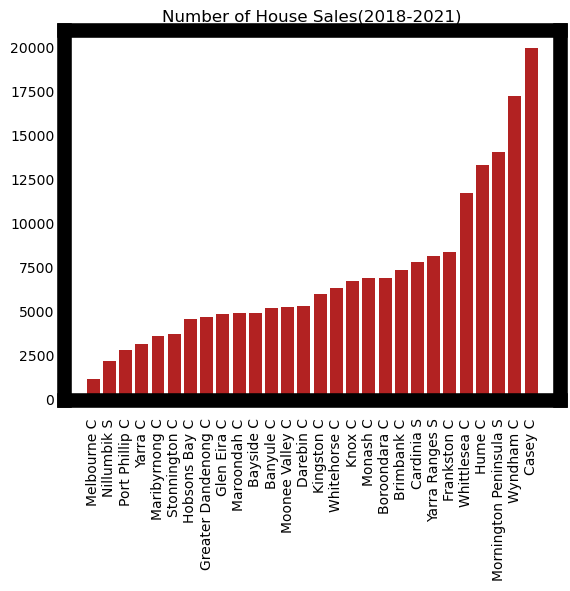

In [400]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

housing_grouped_train=housing_grouped.loc[housing_grouped["With train"]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='House Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City council"],housing_grouped_train["House Number of Sales"],color='firebrick')

#addlabels(housing_grouped_train["City council"],housing_grouped_train["House Number of Sales"])

plt.title("Number of House Sales(2018-2021)")
plt.xticks(rotation=90)
plt.show()

In [431]:
# Files to load from csv

ds                  = pd.read_csv("Resources/Summary.csv")
#print(ds)
#ds.columns          = ["City Council", "Distance", "Stop_lat", "Stop_long", "TotalAnnual", "TotalAMPeak",
#                       "TotalPMPeak", "TotalWeekday", "TotalWeekend", "TotalOffpeak", "TotalIncrease(%)",
#                       "WeekdayIncrease(%)", "AMIncrease(%)", "PMIncrease(%)", "OffPeakIncrease(%)", 
#                       "WeekendIncrease(%)"]
housing_df          = pd.read_csv("Resources/cleaned_housing_data.csv")

In [432]:
housing_df["City Council_format2"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)

In [ ]:
housing_df["City council"]=housing_df["City council"]+"  "
#housing_df=housing_df.merge(train_df, on="City council", how="left")

In [433]:
housing_df.columns = ["City council", "Year", "Unit", "House", "Plot", "Total"]
housing_df

,City council,Year,Unit,House,Plot,Total
0,Alpine S,2018,218,64,106,388
1,Alpine S,2019,214,44,69,327
2,Alpine S,2020,244,47,96,387
3,Alpine S,2021,252,65,72,389
4,Ararat Rural C,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges S,2021,2324,563,195,3082
316,Yarriambiack S,2018,159,2,27,188
317,Yarriambiack S,2019,126,4,29,159
318,Yarriambiack S,2020,153,3,27,183


In [381]:
#Adding column to check if the city council has any train station
housing_df['With train'] = np.where(pd.isna(housing_df['Distance']), 'No', 'Yes')

KeyError: 'Distance'

In [435]:
#housing_df["City Council_format2"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)

Y18         = housing_df.loc[(housing_df['Year'] == 2018)]
Y18.columns = ["City Council", "Year", "Unit18", "House18", "Plot18", "Total18"]
Y18["City council"]=Y18["City council"]+"  "
Y18.drop(["Year"], axis=1, inplace=True)

Y19         = housing_df.loc[(housing_df['Year'] == 2019)]
Y19.columns = ["City Council", "Year", "Unit19", "House19", "Plot19", "Total19"]
Y19["City council"]=Y19["City council"]+"  "
Y19.drop(["Year"], axis=1, inplace=True)

Y20         = housing_df.loc[(housing_df['Year'] == 2020)]
Y20.columns = ["City Council", "Year", "Unit20", "House20", "Plot20", "Total20"]
Y20["City council"]=Y20["City council"]+"  "
Y20.drop(["Year"], axis=1, inplace=True)

Y21         = housing_df.loc[(housing_df['Year'] == 2021)]
Y21.columns = ["City Council", "Year", "Unit21", "House21", "Plot21", "Total21"]
Y21["City council"]=Y21["City council"]+"  "
Y21.drop(["Year"], axis=1, inplace=True)

dh1         = pd.merge(Y18, Y19, how="left", on=["City Council"])
dh2         = pd.merge(Y20, Y21, how="left", on=["City Council"])
dh          = pd.merge(dh1, dh2, how="left", on=["City Council"])

dh["TotalUnit"]  = dh["Unit18"]+dh["Unit19"]+dh["Unit20"]+dh["Unit21"]
dh["TotalHouse"] = dh["House18"]+dh["House19"]+dh["House20"]+dh["House21"]
dh["TotalPlot"]  = dh["Plot18"]+dh["Plot19"]+dh["Plot20"]+dh["Plot21"]
dh["Total"]      = dh["Total18"]+dh["Total19"]+dh["Total20"]+dh["Total21"]
print(dh)

#dh["City council"] = housing_df["City council"]+"  "

#print(ds)
Combined         = pd.merge(dh, ds, how="left", on=["City Council"])
#Combined.dropna()
print(Combined.head(50))

KeyError: 'City council'

In [ ]:
duplicate_cols  = df.columns[df.columns.duplicated()]
df.drop(columns = duplicate_cols, inplace=True)
list(df.columns.values)

In [335]:
dh = housing_df.pivot_table(index='City council', columns='Year')

In [331]:
housing_df.pivot_table(index='City council', columns='Year')

House                           Plot                          \
Year              2018    2019   2020    2021    2018    2019    2020    2021   
City council                                                                    
Alpine S          64.0    44.0   47.0    65.0   106.0    69.0    96.0    72.0   
Ararat Rural C    22.0    20.0   22.0    29.0    25.0    15.0    42.0    27.0   
Ballarat C       559.0   418.0  455.0   486.0  1879.0  1499.0  1876.0  1100.0   
Banyule C        862.0   932.0  794.0  1151.0    19.0    26.0    19.0    18.0   
Bass Coast S     209.0   168.0  168.0   245.0   876.0   445.0   829.0   606.0   
...                ...     ...    ...     ...     ...     ...     ...     ...   
Wodonga C        122.0   119.0  125.0   163.0   327.0   320.0   601.0   327.0   
Wyndham C        585.0   433.0  346.0   607.0  4355.0  2412.0  3965.0  3222.0   
Yarra C         1598.0  1158.0  994.0  1512.0     2.0     2.0     2.0     2.0   
Yarra Ranges S   357.0   368.0  429.0   563.0   159.0   194.0   255.0   195.0   
Yarriambiack S     2.0     4.0    3.0     1.0    27.0    29.0    27.0    36.0   

                 Total                            Unit                          
Year              2018    2019    2020    2021    2018    2019    2020    2021  
City council                                                                    
Alpine S         388.0   327.0   387.0   389.0   218.0   214.0   244.0   252.0  
Ararat Rural C   256.0   229.0   257.0   280.0   209.0   194.0   193.0   224.0  
Ballarat C      4916.0  4059.0  4473.0  4060.0  2478.0  2142.0  2142.0  2474.0  
Banyule C       2158.0  2212.0  1861.0  2768.0  1277.0  1254.0  1048.0  1599.0  
Bass Coast S    2233.0  1571.0  2163.0  2198.0  1148.0   958.0  1166.0  1347.0  
...                ...     ...     ...     ...     ...     ...     ...     ...  
Wodonga C       1163.0  1083.0  1466.0  1404.0   714.0   644.0   740.0   914.0  
Wyndham C       8900.0  6542.0  7856.0  9829.0  3960.0  3697.0  3545.0  6000.0  
Yarra C         2309.0  1857.0  1644.0  2601.0   709.0   697.0   648.0  1087.0  
Yarra Ranges S  2580.0  2535.0  2474.0  3082.0  2064.0  1973.0  1790.0  2324.0  
Yarriambiack S   188.0   159.0   183.0   196.0   159.0   126.0   153.0   159.0  

[79 rows x 16 columns]

In [338]:
housing_df.to_csv("Resources/Housing.csv")

In [341]:
dh            =housing_df.reset_index().rename_axis(None, axis=1)
dh

,index,City council,Year,Unit,House,Plot,Total
0,0,Alpine S,2018,218,64,106,388
1,1,Alpine S,2019,214,44,69,327
2,2,Alpine S,2020,244,47,96,387
3,3,Alpine S,2021,252,65,72,389
4,4,Ararat Rural C,2018,209,22,25,256
...,...,...,...,...,...,...,...
315,315,Yarra Ranges S,2021,2324,563,195,3082
316,316,Yarriambiack S,2018,159,2,27,188
317,317,Yarriambiack S,2019,126,4,29,159
318,318,Yarriambiack S,2020,153,3,27,183


In [325]:
housing_df

,City council,Year,Unit,House,Plot,Total
0,Alpine S,2018,218,64,106,388
1,Alpine S,2019,214,44,69,327
2,Alpine S,2020,244,47,96,387
3,Alpine S,2021,252,65,72,389
4,Ararat Rural C,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges S,2021,2324,563,195,3082
316,Yarriambiack S,2018,159,2,27,188
317,Yarriambiack S,2019,126,4,29,159
318,Yarriambiack S,2020,153,3,27,183


In [295]:
housing_df = housing_df.drop(columns=['House', 'Plot', 'Total'])
housing_df 

KeyError: "['House', 'Plot', 'Total'] not found in axis"

In [294]:
housing_df.pivot(index='City council', columns='Year', values='Unit') #\
#.fillna(0) \
#.reset_index() \
#.rename_axis(None, axis=1)

ValueError: Index contains duplicate entries, cannot reshape

In [284]:
housing_df.set_index(['City council', 'Year', 'Unit', 'House', 'Plot', 'Total'], drop=True).unstack('Year')

Empty DataFrame
Columns: []
Index: [(Alpine S, 214, 44, 69, 327), (Alpine S, 218, 64, 106, 388), (Alpine S, 244, 47, 96, 387), (Alpine S, 252, 65, 72, 389), (Ararat Rural C, 193, 22, 42, 257), (Ararat Rural C, 194, 20, 15, 229), (Ararat Rural C, 209, 22, 25, 256), (Ararat Rural C, 224, 29, 27, 280), (Ballarat C, 2142, 418, 1499, 4059), (Ballarat C, 2142, 455, 1876, 4473), (Ballarat C, 2474, 486, 1100, 4060), (Ballarat C, 2478, 559, 1879, 4916), (Banyule C, 1048, 794, 19, 1861), (Banyule C, 1254, 932, 26, 2212), (Banyule C, 1277, 862, 19, 2158), (Banyule C, 1599, 1151, 18, 2768), (Bass Coast S, 958, 168, 445, 1571), (Bass Coast S, 1148, 209, 876, 2233), (Bass Coast S, 1166, 168, 829, 2163), (Bass Coast S, 1347, 245, 606, 2198), (Baw Baw S, 808, 118, 443, 1369), (Baw Baw S, 867, 132, 925, 1924), (Baw Baw S, 989, 151, 778, 1918), (Baw Baw S, 1153, 152, 570, 1875), (Bayside C, 1073, 733, 15, 1821), (Bayside C, 1153, 850, 11, 2014), (Bayside C, 1207, 868, 4, 2079), (Bayside C, 1511, 1093, 12, 2616), (Benalla Rural C, 215, 34, 50, 299), (Benalla Rural C, 224, 35, 60, 319), (Benalla Rural C, 236, 61, 44, 341), (Benalla Rural C, 257, 27, 72, 356), (Boroondara C, 1398, 1148, 17, 2563), (Boroondara C, 1610, 1523, 24, 3157), (Boroondara C, 1657, 1349, 19, 3025), (Boroondara C, 2221, 1885, 25, 4131), (Borough of Queenscliffe, 71, 20, 6, 97), (Borough of Queenscliffe, 74, 16, 2, 92), (Borough of Queenscliffe, 86, 20, 9, 115), (Borough of Queenscliffe, 94, 21, 5, 120), (Brimbank C, 1408, 467, 149, 2024), (Brimbank C, 1757, 525, 159, 2441), (Brimbank C, 1922, 564, 59, 2545), (Brimbank C, 2250, 761, 111, 3122), (Buloke S, 105, 5, 17, 127), (Buloke S, 123, 3, 18, 144), (Buloke S, 131, 7, 29, 167), (Buloke S, 149, 3, 39, 191), (Campaspe S, 424, 94, 116, 634), (Campaspe S, 480, 68, 237, 785), (Campaspe S, 491, 81, 127, 699), (Campaspe S, 607, 95, 74, 776), (Cardinia S, 1669, 197, 1209, 3075), (Cardinia S, 1726, 208, 789, 2723), (Cardinia S, 1853, 235, 903, 2991), (Cardinia S, 2583, 285, 781, 3649), (Casey C, 4365, 562, 4235, 9162), (Casey C, 4511, 584, 2677, 7772), (Casey C, 4683, 522, 2328, 7533), (Casey C, 6406, 875, 2107, 9388), (Central Goldfields S, 203, 25, 67, 295), (Central Goldfields S, 207, 23, 41, 271), (Central Goldfields S, 233, 36, 36, 305), (Central Goldfields S, 294, 32, 93, 419), (Colac Otway S, 340, 50, 136, 526), (Colac Otway S, 350, 52, 141, 543), (Colac Otway S, 374, 62, 177, 613), (Colac Otway S, 387, 55, 111, 553), (Corangamite S, 177, 10, 41, 228), (Corangamite S, 211, 14, 44, 269), (Corangamite S, 217, 13, 67, 297), (Corangamite S, 251, 18, 46, 315), (Darebin C, 1107, 1174, 5, 2286), (Darebin C, 1267, 1242, 12, 2521), (Darebin C, 1290, 1402, 16, 2708), (Darebin C, 1635, 1878, 20, 3533), (East Gippsland S, 843, 132, 332, 1307), (East Gippsland S, 923, 147, 368, 1438), (East Gippsland S, 1012, 86, 567, 1665), (East Gippsland S, 1243, 106, 513, 1862), (Frankston C, 0, 0, 0, 0), (Frankston C, 0, 0, 1, 1), (Frankston C, 0, 0, 7, 7), (Frankston C, 1810, 813, 58, 2681), (Frankston C, 1986, 752, 86, 2824), (Frankston C, 2117, 803, 69, 2989), (Frankston C, 2465, 1131, 50, 3646), (Gannawarra S, 161, 9, 34, 204), (Gannawarra S, 173, 15, 59, 247), (Gannawarra S, 194, 8, 40, 242), (Gannawarra S, 232, 15, 54, 301), (Glen Eira C, 948, 1479, 5, 2432), (Glen Eira C, 1224, 1736, 13, 2973), (Glen Eira C, 1283, 1456, 14, 2753), (Glen Eira C, 1435, 2269, 8, 3712), (Glenelg S, 349, 58, 72, 479), (Glenelg S, 363, 30, 148, 541), (Glenelg S, 393, 47, 107, 547), (Glenelg S, 418, 39, 71, 528), (Golden Plains S, 117, 4, 52, 173), ...]

[319 rows x 0 columns]

In [282]:
medals = housing_df.pivot_table('Year', ['City council', 'Unit', 'House', 'Plot', 'Total'], 'Year')
medals.reset_index( drop=False, inplace=True )

In [283]:
print(medals)

Year    City council  Unit  House  Plot  Total
0           Alpine S   214     44    69    327
1           Alpine S   218     64   106    388
2           Alpine S   244     47    96    387
3           Alpine S   252     65    72    389
4     Ararat Rural C   193     22    42    257
..               ...   ...    ...   ...    ...
314   Yarra Ranges S  2324    563   195   3082
315   Yarriambiack S   126      4    29    159
316   Yarriambiack S   153      3    27    183
317   Yarriambiack S   159      1    36    196
318   Yarriambiack S   159      2    27    188

[319 rows x 5 columns]


In [330]:
#dh = housing_df.groupby(["City council", "Year"]).sum()
#print(dh)

housing_df.groupby(["City council", "Year"])
housing_df.count().head(10)

City council    320
Year            320
Unit            320
House           320
Plot            320
Total           320
dtype: int64

In [ ]:
medals = dh.pivot_table('no of medals', ['City Council_format2', 'House Number of Sales', 'Unit/Apartment Number of Sales', ,], 'medal')

In [202]:
import pandas as pd

df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [203]:
df["City"].tolist()

['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas']

In [201]:
Summary

,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
2,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
4,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296
5,Casey C,38.423380,-38.053639,145.285476,14640650.0,21750.0,8000.0,52900.0,38050.0,23300.0,90.475990,83.763838,77.868852,109.375000,84.482759,127.083333
6,Darebin C,8.325017,-37.751181,145.005097,22618650.0,33100.0,16400.0,75850.0,76200.0,28000.0,74.413574,71.428571,60.089686,94.444444,76.100629,87.710843
7,Frankston C,37.594584,-38.130197,145.132306,6626350.0,6950.0,4300.0,21100.0,26250.0,11050.0,73.995852,70.229008,57.446809,84.000000,73.846154,90.140845
8,Glen Eira C,10.860237,-37.897642,145.035702,24589800.0,31150.0,21350.0,82600.0,91750.0,30350.0,61.875909,61.489699,59.574468,68.518519,58.649789,68.815592
9,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,61500.0,25650.0,77.955547,76.800000,65.151515,90.526316,77.702703,89.425982


In [221]:
df.hvplot.points(x='Longitude', y='Latitude', geo = True, padding=0.2, hover_cols='all', width=300) * \
df.hvplot.labels(x='Longitude', y='Latitude', geo = True, text='City', text_baseline='bottom', hover=False) * \
df.hvplot.labels(x='Longitude', y='Latitude', geo = True, text='Country', text_baseline='top', hover=False)

:Overlay
   .Points.I  :Points   [Longitude,Latitude]   (index,City,Country)
   .Labels.I  :Labels   [Longitude,Latitude]   (City)
   .Labels.II :Labels   [Longitude,Latitude]   (Country)

In [223]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))

#Councils = np.str('Banyule C  ', 'Bayside C  ', 'Boroondara C  ', 'Brimbank C  ', 'Cardinia S  ', 'Casey C  ', 'Darebin C  ', 'Frankston C  ', 'Glen Eira C  ', 'Greater Dandenong C  ', 'Hobsons Bay C  ', 'Hume C  ', 'Kingston C  ', 'Knox C  ', 'Maribyrnong C  ', 'Maroondah C  ', 'Melbourne C  ', 'Merry-bek C', 'Merry-bek C ', 'Merry-bek C  ', 'Monash C  ', 'Moonee Valley C  ', 'Mornington Peninsula S  ', 'Nillumbik S  ', 'Port Phillip C  ', 'Stonnington C  ', 'Whitehorse C  ', 'Whittlesea C  ', 'Wyndham C  ', 'Yarra C  ', 'Yarra Ranges S  ')
#Summary.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Summary["TotalWeekday"]/150, cmap=cm, color=Summary["TotalWeekday"]/150, line_width=1,
#                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
Summary.hvplot.points(x='Stop_long', y='Stop_lat', tiles = "OSM", label='Metro Station', padding=0.2, hover_cols='all', width=300) * Summary.hvplot.labels(x='Stop_long', y='Stop_lat', tiles = "OSM", marker='circle', size= 1000, text='Distance', text_baseline='bottom' , hover=False) 
#df.hvplot.labels(x='Longitude', y='Latitude',  tiles = "OSM", text='Country', text_baseline='top', hover=False)
#Summary * Summary.hvplot.labels(Summary)

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (index,City council,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%))
   .Tiles.II             :Tiles   [x,y]
   .Labels.I             :Labels   [Stop_long,Stop_lat]   (Distance)

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# Plot to show distibution of annual footfall by city council

Summary        = Summary.sort_values(['TotalAnnual'])
numbers        = Summary['TotalAnnual']
print(numbers)

plt.figure(figsize=(9,7))
numbers.plot(kind="bar")
#plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
#plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xlabel("City councils", fontsize=20)
plt.ylabel("Annual passenger footfall (2018-23)", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.show()

City council
Merri-Bek C                  32.874839
Merri-Bek C                  35.438317
Whitehorse C                 41.018165
Wyndham C                    45.933378
Brimbank C                   50.600815
Nillumbik S                  53.924523
Knox C                       54.680802
Merri-Bek C                  54.740671
Yarra Ranges S               55.106279
Banyule C                    57.926785
Hume C                       58.530537
Mornington Peninsula S       59.111617
Maroondah C                  59.621581
Melbourne C                  60.184951
Glen Eira C                  61.875909
Kingston C                   63.335346
Port Phillip C               64.103614
Maribyrnong C                66.211468
Boroondara C                 66.560298
Bayside C                    66.655851
Stonnington C                68.313035
Frankston C                  73.995852
Darebin C                    74.413574
Yarra C                      74.572407
Monash C                     75.419097
Greater Dand

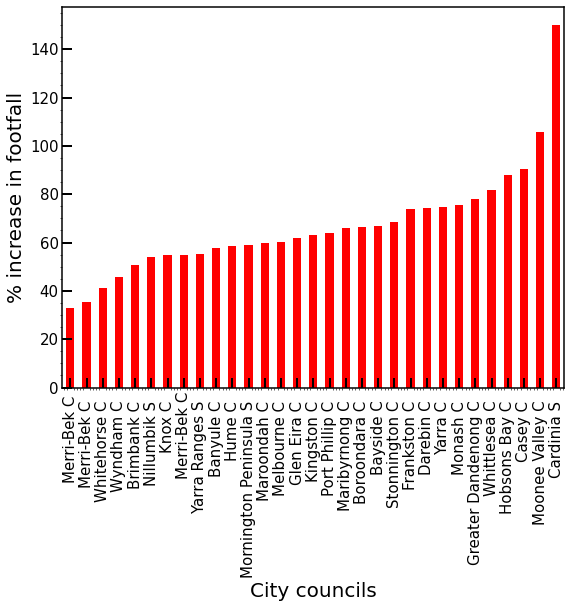

In [231]:
# Plot to show distibution of annual footfall by city council

Summary        = Summary.sort_values(['TotalIncrease(%)'])
numbers        = Summary['TotalIncrease(%)']
print(numbers)

plt.figure(figsize=(9,7))
numbers.plot(kind="bar", color='r')
#plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
#plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.ylabel("% increase in footfall", fontsize=20)
plt.xlabel("City councils", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.show()

In [212]:
#df1    = df.sort_values(by='TotalAnnual', ascending=False)
#df1_22 = df.sort_values(by='Pax_annual2223', ascending=False)
#df1_21 = df.sort_values(by='Pax_annual2122', ascending=False)
#df1_20 = df.sort_values(by='Pax_annual2021', ascending=False)
#df1_19 = df.sort_values(by='Pax_annual1920', ascending=False)
#df1_18 = df.sort_values(by='Pax_annual1819', ascending=False)
df_pi  = df.sort_values(by='PerIncrease', ascending=False)

KeyError: 'PerIncrease'

In [138]:
df_pi.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,PerIncrease
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,50,50,100,7813200.0,7600.0,8600.0,26000.0,26100.0,10100.0,2.422674
207,208.0,FY18-19,46468.0,Williams Landing,-37.869865,144.747445,1756650.0,6300.0,6500.0,5650.0,...,100,300,50,2939400.0,5450.0,1350.0,10650.0,6850.0,3900.0,10.736345
100,101.0,FY18-19,19933.0,Ivanhoe,-37.768897,145.045425,781000.0,2700.0,2850.0,2200.0,...,50,100,50,1328950.0,2200.0,1200.0,4800.0,3650.0,1600.0,12.234315
102,103.0,FY18-19,19935.0,Heidelberg,-37.757073,145.060686,791600.0,2750.0,2900.0,2200.0,...,50,50,50,1421400.0,1700.0,1800.0,5100.0,3950.0,1800.0,12.550531
181,182.0,FY18-19,20021.0,Sunshine,-37.788536,144.832878,2157750.0,7000.0,7150.0,6250.0,...,300,300,50,3714650.0,4650.0,3100.0,12400.0,12250.0,4850.0,21.635963
64,65.0,FY18-19,19895.0,Surrey Hills,-37.824148,145.098775,725200.0,2500.0,2600.0,2150.0,...,100,100,50,1795150.0,3550.0,1000.0,6200.0,5200.0,1800.0,24.220905
178,179.0,FY18-19,20016.0,Northcote,-37.769865,144.995277,400750.0,1350.0,1400.0,1100.0,...,50,100,50,1056400.0,1600.0,800.0,3550.0,3650.0,1250.0,25.352464
195,196.0,FY18-19,20037.0,Essendon,-37.756012,144.916198,1480050.0,5050.0,5200.0,4500.0,...,250,200,50,2423100.0,4450.0,1400.0,8400.0,6800.0,2650.0,25.904530
95,96.0,FY18-19,19928.0,Westgarth,-37.780621,144.999233,298000.0,1000.0,1000.0,850.0,...,50,50,50,624500.0,1000.0,400.0,2050.0,2250.0,950.0,26.627517
202,203.0,FY18-19,40221.0,Craigieburn,-37.601817,144.943320,1236250.0,4100.0,4200.0,3700.0,...,250,100,50,4862900.0,6400.0,3750.0,16600.0,15450.0,6400.0,26.790698


In [109]:
df1.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,56700,57200,47800,35350,1350,3300,11200,29950,10900,50701000.0
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,2000,1750,3500,3750,50,150,300,800,700,29585600.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,30600,22700,13700,10550,250,1300,7100,17050,4950,24220550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3500,3100,3200,2350,150,550,750,1700,350,18632650.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,1250,1150,950,650,50,400,350,350,50,16098350.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,18700,12750,4000,2750,100,850,3100,12650,2050,15805800.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,850,800,550,450,50,300,200,250,50,11987550.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,9550,6850,5600,3900,250,2250,2250,3950,850,10329500.0


In [110]:
df1_22.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,56700,57200,47800,35350,1350,3300,11200,29950,10900,50701000.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,30600,22700,13700,10550,250,1300,7100,17050,4950,24220550.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,18700,12750,4000,2750,100,850,3100,12650,2050,15805800.0
183,184.0,FY18-19,20023.0,West Footscray,-37.801809,144.885325,733050.0,2500.0,2550.0,2300.0,...,13600,10400,7750,5350,650,3800,3650,4600,850,5578450.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,9550,6850,5600,3900,250,2250,2250,3950,850,10329500.0
210,211.0,FY18-19,19841.0,Flagstaff,-37.811981,144.955654,4854950.0,18500.0,19300.0,15400.0,...,11000,7550,2150,1550,100,700,2100,7150,950,8274150.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,8900,5200,6000,5650,250,2250,2150,3050,1150,9216950.0
198,199.0,FY18-19,20040.0,Newmarket,-37.787328,144.928978,893850.0,3000.0,3100.0,2600.0,...,6350,5800,3750,2950,250,1550,1650,2300,500,4037800.0


In [112]:
df1_21.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,2000,1750,3500,3750,50,150,300,800,700,29585600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,850,800,550,450,50,300,200,250,50,11987550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3500,3100,3200,2350,150,550,750,1700,350,18632650.0
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,2350,2050,1450,1200,150,550,700,800,150,8087550.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,750,650,450,350,50,200,200,250,50,5887900.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
111,112.0,FY18-19,19944.0,Malvern,-37.866253,145.029294,832800.0,2750.0,3000.0,1750.0,...,1850,1000,1100,850,50,550,450,700,150,6432000.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,56700,57200,47800,35350,1350,3300,11200,29950,10900,50701000.0
201,202.0,FY18-19,40220.0,Roxburgh Park,-37.638231,144.935404,575000.0,1950.0,2000.0,1800.0,...,650,550,350,250,50,300,150,100,50,3769650.0


In [113]:
df1_20.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,2000,1750,3500,3750,50,150,300,800,700,29585600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,850,800,550,450,50,300,200,250,50,11987550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3500,3100,3200,2350,150,550,750,1700,350,18632650.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,150,50,1400,100,50,50,50,50,100,7813200.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,9550,6850,5600,3900,250,2250,2250,3950,850,10329500.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,56700,57200,47800,35350,1350,3300,11200,29950,10900,50701000.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,8900,5200,6000,5650,250,2250,2150,3050,1150,9216950.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
201,202.0,FY18-19,40220.0,Roxburgh Park,-37.638231,144.935404,575000.0,1950.0,2000.0,1800.0,...,650,550,350,250,50,300,150,100,50,3769650.0


In [114]:
df1_19.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,1250,1150,950,650,50,400,350,350,50,16098350.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3500,3100,3200,2350,150,550,750,1700,350,18632650.0
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,2000,1750,3500,3750,50,150,300,800,700,29585600.0
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,2350,2050,1450,1200,150,550,700,800,150,8087550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,750,650,450,350,50,200,200,250,50,5887900.0
218,219.0,FY18-19,19918.0,Hughesdale,-37.894881,145.077635,443900.0,1500.0,1650.0,850.0,...,1550,1300,1400,1050,50,450,400,550,100,5288050.0
111,112.0,FY18-19,19944.0,Malvern,-37.866253,145.029294,832800.0,2750.0,3000.0,1750.0,...,1850,1000,1100,850,50,550,450,700,150,6432000.0
202,203.0,FY18-19,40221.0,Craigieburn,-37.601817,144.943320,1236250.0,4100.0,4200.0,3700.0,...,1250,800,450,350,200,650,250,100,50,4862900.0


In [115]:
df1_18.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,56700,57200,47800,35350,1350,3300,11200,29950,10900,50701000.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,37050,31400,19550,16250,450,2400,6750,23000,4400,55256800.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,30600,22700,13700,10550,250,1300,7100,17050,4950,24220550.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,18700,12750,4000,2750,100,850,3100,12650,2050,15805800.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,150,50,1400,100,50,50,50,50,100,7813200.0
210,211.0,FY18-19,19841.0,Flagstaff,-37.811981,144.955654,4854950.0,18500.0,19300.0,15400.0,...,11000,7550,2150,1550,100,700,2100,7150,950,8274150.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,9550,6850,5600,3900,250,2250,2250,3950,850,10329500.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,8000,7300,11050,8750,150,850,1050,3400,2550,20914200.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,8900,5200,6000,5650,250,2250,2150,3050,1150,9216950.0
200,201.0,FY18-19,20042.0,Box Hill,-37.819222,145.121429,3685500.0,12200.0,12600.0,10650.0,...,3600,3150,2300,1800,650,1700,750,400,100,5926100.0


In [118]:
df3    = df.sort_values(by='TotalAMPeak', ascending=False)
df3_22 = df.sort_values(by='Pax_AM_peak2223', ascending=False)
df3_21 = df.sort_values(by='Pax_AM_peak2122', ascending=False)
df3_20 = df.sort_values(by='Pax_AM_peak2021', ascending=False)
df3_19 = df.sort_values(by='Pax_AM_peak1920', ascending=False)
df3_18 = df.sort_values(by='Pax_AM_peak1819', ascending=False)

In [119]:
df3.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
42,43.0,FY18-19,19873.0,Glen Waverley,-37.879504,145.162058,1693350.0,5650.0,5700.0,5500.0,...,3200,2500,300,1750,850,800,250,5257650.0,7900.0,3100.0
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,1450,1200,150,550,700,800,150,8087550.0,7900.0,9000.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,1400,100,50,50,50,50,100,7813200.0,7600.0,8600.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
200,201.0,FY18-19,20042.0,Box Hill,-37.819222,145.121429,3685500.0,12200.0,12600.0,10650.0,...,2300,1800,650,1700,750,400,100,5926100.0,7350.0,5150.0
67,68.0,FY18-19,19898.0,Blackburn,-37.820071,145.150014,1484400.0,5050.0,5250.0,4350.0,...,1600,1300,150,1050,550,700,100,4445000.0,7150.0,3400.0
23,24.0,FY18-19,19853.0,Camberwell,-37.826567,145.058697,1969600.0,6250.0,6450.0,5550.0,...,3150,2900,200,1950,1250,1750,300,6527800.0,6800.0,8100.0


In [120]:
df3_22.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
183,184.0,FY18-19,20023.0,West Footscray,-37.801809,144.885325,733050.0,2500.0,2550.0,2300.0,...,7750,5350,650,3800,3650,4600,850,5578450.0,6600.0,5550.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
205,206.0,FY18-19,45794.0,Cardinia Road,-38.071290,145.437791,381850.0,1350.0,1450.0,1000.0,...,1800,1300,500,2300,800,450,100,2200600.0,4350.0,800.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
23,24.0,FY18-19,19853.0,Camberwell,-37.826567,145.058697,1969600.0,6250.0,6450.0,5550.0,...,3150,2900,200,1950,1250,1750,300,6527800.0,6800.0,8100.0
156,157.0,FY18-19,19994.0,Newport,-37.842718,144.883600,1334350.0,4400.0,4450.0,4050.0,...,2100,1700,250,1800,650,650,150,3289000.0,5600.0,2000.0
42,43.0,FY18-19,19873.0,Glen Waverley,-37.879504,145.162058,1693350.0,5650.0,5700.0,5500.0,...,3200,2500,300,1750,850,800,250,5257650.0,7900.0,3100.0
200,201.0,FY18-19,20042.0,Box Hill,-37.819222,145.121429,3685500.0,12200.0,12600.0,10650.0,...,2300,1800,650,1700,750,400,100,5926100.0,7350.0,5150.0


In [122]:
df3_21.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,1450,1200,150,550,700,800,150,8087550.0,7900.0,9000.0
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,550,450,50,300,200,250,50,11987550.0,3500.0,21500.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,450,350,50,200,200,250,50,5887900.0,5500.0,8000.0
111,112.0,FY18-19,19944.0,Malvern,-37.866253,145.029294,832800.0,2750.0,3000.0,1750.0,...,1100,850,50,550,450,700,150,6432000.0,5350.0,7300.0
201,202.0,FY18-19,40220.0,Roxburgh Park,-37.638231,144.935404,575000.0,1950.0,2000.0,1800.0,...,350,250,50,300,150,100,50,3769650.0,4100.0,3550.0
182,183.0,FY18-19,20022.0,Tottenham,-37.799251,144.862945,613100.0,2050.0,2100.0,1900.0,...,350,250,50,300,100,100,50,3966350.0,4750.0,3350.0
208,209.0,FY18-19,52095.0,Southland,-37.958758,145.049124,557650.0,1600.0,1600.0,1600.0,...,300,200,100,300,100,50,50,2315900.0,3300.0,1350.0
157,158.0,FY18-19,19995.0,Spotswood,-37.830639,144.885933,344850.0,1150.0,1150.0,1100.0,...,700,550,50,300,150,200,50,2484950.0,4000.0,1600.0
196,197.0,FY18-19,20038.0,Moonee Ponds,-37.765707,144.919161,858700.0,2850.0,2900.0,2650.0,...,1100,800,100,700,350,350,100,2959100.0,4400.0,2300.0


In [123]:
df3_20.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,1400,100,50,50,50,50,100,7813200.0,7600.0,8600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,550,450,50,300,200,250,50,11987550.0,3500.0,21500.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
201,202.0,FY18-19,40220.0,Roxburgh Park,-37.638231,144.935404,575000.0,1950.0,2000.0,1800.0,...,350,250,50,300,150,100,50,3769650.0,4100.0,3550.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
56,57.0,FY18-19,19887.0,Merinda Park,-38.079000,145.263511,306950.0,1100.0,1200.0,750.0,...,550,400,300,750,250,100,50,2350050.0,3200.0,1750.0
181,182.0,FY18-19,20021.0,Sunshine,-37.788536,144.832878,2157750.0,7000.0,7150.0,6250.0,...,750,500,150,950,300,300,50,3714650.0,4650.0,3100.0
90,91.0,FY18-19,19923.0,Laverton,-37.863694,144.772617,1196550.0,4200.0,4300.0,3800.0,...,1250,950,400,1050,550,500,50,4048100.0,6650.0,2300.0
203,204.0,FY18-19,44817.0,Coolaroo,-37.661003,144.926056,335750.0,1200.0,1200.0,1100.0,...,500,350,250,500,200,100,50,2391000.0,3800.0,950.0


In [124]:
df3_19.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,1450,1200,150,550,700,800,150,8087550.0,7900.0,9000.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,450,350,50,200,200,250,50,5887900.0,5500.0,8000.0
209,210.0,FY18-19,52159.0,Middle Gorge,-37.644062,145.092140,192700.0,700.0,750.0,450.0,...,1350,950,450,1100,400,250,50,2860350.0,4700.0,1450.0
202,203.0,FY18-19,40221.0,Craigieburn,-37.601817,144.943320,1236250.0,4100.0,4200.0,3700.0,...,450,350,200,650,250,100,50,4862900.0,6400.0,3750.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,950,650,50,400,350,350,50,16098350.0,4350.0,38350.0
197,198.0,FY18-19,20039.0,Ascot Vale,-37.775306,144.921821,594300.0,2000.0,2050.0,1850.0,...,850,600,50,550,250,300,50,3060050.0,5000.0,2050.0
163,164.0,FY18-19,20001.0,Keilor Plains,-37.729279,144.793738,808750.0,2750.0,2850.0,2450.0,...,850,650,250,850,300,150,50,3442950.0,5800.0,1250.0
42,43.0,FY18-19,19873.0,Glen Waverley,-37.879504,145.162058,1693350.0,5650.0,5700.0,5500.0,...,3200,2500,300,1750,850,800,250,5257650.0,7900.0,3100.0
67,68.0,FY18-19,19898.0,Blackburn,-37.820071,145.150014,1484400.0,5050.0,5250.0,4350.0,...,1600,1300,150,1050,550,700,100,4445000.0,7150.0,3400.0


In [125]:
df3_18.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,1400,100,50,50,50,50,100,7813200.0,7600.0,8600.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
200,201.0,FY18-19,20042.0,Box Hill,-37.819222,145.121429,3685500.0,12200.0,12600.0,10650.0,...,2300,1800,650,1700,750,400,100,5926100.0,7350.0,5150.0
207,208.0,FY18-19,46468.0,Williams Landing,-37.869865,144.747445,1756650.0,6300.0,6500.0,5650.0,...,250,200,100,250,100,300,50,2939400.0,5450.0,1350.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
162,163.0,FY18-19,20000.0,Watergardens,-37.701129,144.774180,1689500.0,5800.0,5950.0,5200.0,...,1850,1450,450,1700,750,450,100,3498000.0,5900.0,1450.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
42,43.0,FY18-19,19873.0,Glen Waverley,-37.879504,145.162058,1693350.0,5650.0,5700.0,5500.0,...,3200,2500,300,1750,850,800,250,5257650.0,7900.0,3100.0
195,196.0,FY18-19,20037.0,Essendon,-37.756012,144.916198,1480050.0,5050.0,5200.0,4500.0,...,750,600,100,700,250,200,50,2423100.0,4450.0,1400.0


In [126]:
df4    = df.sort_values(by='TotalPMPeak', ascending=False)
df4_22 = df.sort_values(by='Pax_PM_peak2223', ascending=False)
df4_21 = df.sort_values(by='Pax_PM_peak2122', ascending=False)
df4_20 = df.sort_values(by='Pax_PM_peak2021', ascending=False)
df4_19 = df.sort_values(by='Pax_PM_peak1920', ascending=False)
df4_18 = df.sort_values(by='Pax_PM_peak1819', ascending=False)

In [128]:
df4.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,13700,10550,250,1300,7100,17050,4950,24220550.0,3600.0,47650.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,4000,2750,100,850,3100,12650,2050,15805800.0,3600.0,41850.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,950,650,50,400,350,350,50,16098350.0,4350.0,38350.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3200,2350,150,550,750,1700,350,18632650.0,3300.0,38200.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
210,211.0,FY18-19,19841.0,Flagstaff,-37.811981,144.955654,4854950.0,18500.0,19300.0,15400.0,...,2150,1550,100,700,2100,7150,950,8274150.0,2000.0,22000.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,550,450,50,300,200,250,50,11987550.0,3500.0,21500.0


In [129]:
df4_22.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,13700,10550,250,1300,7100,17050,4950,24220550.0,3600.0,47650.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,4000,2750,100,850,3100,12650,2050,15805800.0,3600.0,41850.0
210,211.0,FY18-19,19841.0,Flagstaff,-37.811981,144.955654,4854950.0,18500.0,19300.0,15400.0,...,2150,1550,100,700,2100,7150,950,8274150.0,2000.0,22000.0
183,184.0,FY18-19,20023.0,West Footscray,-37.801809,144.885325,733050.0,2500.0,2550.0,2300.0,...,7750,5350,650,3800,3650,4600,850,5578450.0,6600.0,5550.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
73,74.0,FY18-19,19904.0,Glenferrie,-37.821467,145.036439,2729100.0,9800.0,10450.0,7350.0,...,2400,1850,100,950,1800,3050,600,7738050.0,4800.0,13550.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0


In [130]:
df4_21.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,550,450,50,300,200,250,50,11987550.0,3500.0,21500.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3200,2350,150,550,750,1700,350,18632650.0,3300.0,38200.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,1450,1200,150,550,700,800,150,8087550.0,7900.0,9000.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,450,350,50,200,200,250,50,5887900.0,5500.0,8000.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
111,112.0,FY18-19,19944.0,Malvern,-37.866253,145.029294,832800.0,2750.0,3000.0,1750.0,...,1100,850,50,550,450,700,150,6432000.0,5350.0,7300.0
73,74.0,FY18-19,19904.0,Glenferrie,-37.821467,145.036439,2729100.0,9800.0,10450.0,7350.0,...,2400,1850,100,950,1800,3050,600,7738050.0,4800.0,13550.0


In [131]:
df4_20.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,550,450,50,300,200,250,50,11987550.0,3500.0,21500.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3200,2350,150,550,750,1700,350,18632650.0,3300.0,38200.0
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,1400,100,50,50,50,50,100,7813200.0,7600.0,8600.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
56,57.0,FY18-19,19887.0,Merinda Park,-38.079000,145.263511,306950.0,1100.0,1200.0,750.0,...,550,400,300,750,250,100,50,2350050.0,3200.0,1750.0


In [132]:
df4_19.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,950,650,50,400,350,350,50,16098350.0,4350.0,38350.0
216,217.0,FY18-19,19979.0,Jolimont,-37.816527,144.984098,1096750.0,2800.0,2750.0,3000.0,...,3500,3750,50,150,300,800,700,29585600.0,5250.0,54600.0
215,216.0,FY18-19,19973.0,North Melbourne,-37.806310,144.941510,1497300.0,4550.0,4700.0,3950.0,...,3200,2350,150,550,750,1700,350,18632650.0,3300.0,38200.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
186,187.0,FY18-19,20026.0,South Kensington,-37.799531,144.925469,412850.0,1400.0,1450.0,1300.0,...,1450,1200,150,550,700,800,150,8087550.0,7900.0,9000.0
127,128.0,FY18-19,19960.0,Upfield,-37.666078,144.946740,366300.0,1200.0,1250.0,1000.0,...,450,350,50,200,200,250,50,5887900.0,5500.0,8000.0
218,219.0,FY18-19,19918.0,Hughesdale,-37.894881,145.077635,443900.0,1500.0,1650.0,850.0,...,1400,1050,50,450,400,550,100,5288050.0,3200.0,7050.0
73,74.0,FY18-19,19904.0,Glenferrie,-37.821467,145.036439,2729100.0,9800.0,10450.0,7350.0,...,2400,1850,100,950,1800,3050,600,7738050.0,4800.0,13550.0
111,112.0,FY18-19,19944.0,Malvern,-37.866253,145.029294,832800.0,2750.0,3000.0,1750.0,...,1100,850,50,550,450,700,150,6432000.0,5350.0,7300.0


In [134]:
df4_18.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
213,214.0,FY18-19,19854.0,Flinders Street,-37.818305,144.966964,28320650.0,93050.0,94900.0,85900.0,...,47800,35350,1350,3300,11200,29950,10900,50701000.0,9800.0,93050.0
217,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,19550,16250,450,2400,6750,23000,4400,55256800.0,10800.0,117050.0
211,212.0,FY18-19,19842.0,Melbourne Central,-37.809939,144.962593,15250700.0,51500.0,53150.0,45000.0,...,13700,10550,250,1300,7100,17050,4950,24220550.0,3600.0,47650.0
212,213.0,FY18-19,19843.0,Parliament,-37.811054,144.972911,10124200.0,38000.0,39650.0,31600.0,...,4000,2750,100,850,3100,12650,2050,15805800.0,3600.0,41850.0
210,211.0,FY18-19,19841.0,Flagstaff,-37.811981,144.955654,4854950.0,18500.0,19300.0,15400.0,...,2150,1550,100,700,2100,7150,950,8274150.0,2000.0,22000.0
185,186.0,FY18-19,20025.0,Footscray,-37.801083,144.903199,5332950.0,17700.0,18300.0,15300.0,...,1400,100,50,50,50,50,100,7813200.0,7600.0,8600.0
126,127.0,FY18-19,19959.0,South Yarra,-37.838449,144.992342,4367150.0,14500.0,15450.0,10700.0,...,5600,3900,250,2250,2250,3950,850,10329500.0,9050.0,14550.0
214,215.0,FY18-19,19908.0,Richmond,-37.824074,144.990164,4227000.0,11800.0,11850.0,11650.0,...,11050,8750,150,850,1050,3400,2550,20914200.0,4600.0,36700.0
110,111.0,FY18-19,19943.0,Caulfield,-37.877459,145.042525,4175050.0,12800.0,13500.0,10050.0,...,6000,5650,250,2250,2150,3050,1150,9216950.0,7450.0,10150.0
73,74.0,FY18-19,19904.0,Glenferrie,-37.821467,145.036439,2729100.0,9800.0,10450.0,7350.0,...,2400,1850,100,950,1800,3050,600,7738050.0,4800.0,13550.0


In [ ]:
df2    = df.sort_values(by='Totalfootfall', ascending=True)

In [104]:
df2.head(20)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall
7,8.0,FY18-19,19834.0,Baxter,-38.194043,145.160526,3400.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,10900.0
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,17300.0
5,6.0,FY18-19,19832.0,Tyabb,-38.259815,145.186401,5600.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,17750.0
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,22750.0
9,10.0,FY18-19,19836.0,Leawarra,-38.152034,145.139534,10250.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,30950.0
6,7.0,FY18-19,19833.0,Somerville,-38.225342,145.176245,13150.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,38800.0
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,41200.0
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,53300.0
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,68050.0
15,16.0,FY18-19,19845.0,Tecoma,-37.908118,145.342995,75650.0,250.0,250.0,250.0,...,150,150,100,50,50,50,50,50,50,241800.0


In [181]:
ds.head()

,Zone,Line name,Stop_name,City council
0,2,Sunbury line,Sunbury,Hume C
1,2,Sunbury line,Diggers Rest,Hume C
2,2,Sunbury line,Watergardens,Brimbank C
3,2,Sunbury line,Keilor Plains,Brimbank C
4,2,Sunbury line,St Albans,Brimbank C


In [26]:
df

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,22750.0,250.0,250.0,250.0,500.0,750.0
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,53300.0,250.0,250.0,250.0,700.0,750.0
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,17300.0,250.0,250.0,250.0,500.0,750.0
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,41200.0,250.0,250.0,250.0,500.0,750.0
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,68050.0,250.0,250.0,250.0,500.0,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219.0,FY18-19,19918.0,Hughesdale,-37.894881,145.077635,443900.0,1500.0,1650.0,850.0,...,450,400,550,100,5288050.0,3200.0,7050.0,16250.0,24550.0,6000.0
219,220.0,FY18-19,20028.0,Showgrounds,-37.783500,144.915000,180000.0,400.0,200.0,1300.0,...,50,50,50,50,2363700.0,850.0,3000.0,6150.0,12850.0,2600.0
220,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,300,200,250,50,11987550.0,3500.0,21500.0,38000.0,44750.0,13050.0
221,222.0,FY18-19,52161.0,Mernda,-37.602549,145.100883,562350.0,1900.0,1950.0,1550.0,...,400,350,350,50,16098350.0,4350.0,38350.0,58750.0,34900.0,16300.0


In [ ]:
# Import CSV files
#stationlist  = "Resources/stations.csv"

# Read the data and the study results
ds           = pd.read_csv("Resources/StationList.csv")
set3 = pd.merge(ds, df, how="left", on=["Stop_name"])

In [82]:
# Import CSV files
#stationlist  = "Resources/stations.csv"

# Read the data and the study results
ds           = pd.read_csv("Resources/StationList.csv")

In [83]:
set3 = pd.merge(ds, df, how="left", on=["Stop_name"])

In [84]:
set3

,Zone,Line name,Stop_name,City council,_id,year1819,Stop_ID,Stop_lat,Stop_long,Pax_annual1819,...,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak
0,2,Sunbury line,Sunbury,Hume C,161.0,FY18-19,15351.0,-37.579091,144.727319,803350.0,...,650.0,350.0,350.0,50.0,2269000.0,3000.0,1250.0,7450.0,7650.0,3150.0
1,2,Sunbury line,Diggers Rest,Hume C,162.0,FY18-19,15353.0,-37.627017,144.719922,221250.0,...,250.0,50.0,50.0,50.0,1401850.0,2050.0,650.0,4750.0,4300.0,2250.0
2,2,Sunbury line,Watergardens,Brimbank C,163.0,FY18-19,20000.0,-37.701129,144.774180,1689500.0,...,1700.0,750.0,450.0,100.0,3498000.0,5900.0,1450.0,12050.0,9800.0,4800.0
3,2,Sunbury line,Keilor Plains,Brimbank C,164.0,FY18-19,20001.0,-37.729279,144.793738,808750.0,...,850.0,300.0,150.0,50.0,3442950.0,5800.0,1250.0,11900.0,10100.0,4650.0
4,2,Sunbury line,St Albans,Brimbank C,165.0,FY18-19,20002.0,-37.744861,144.800050,1191150.0,...,1050.0,900.0,550.0,100.0,3492550.0,4800.0,1800.0,11750.0,11350.0,5050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1,Werribee line,Yarraville,Maribyrnong C,159.0,FY18-19,19996.0,-37.815850,144.889934,998400.0,...,1100.0,450.0,450.0,150.0,2510950.0,4050.0,1550.0,8250.0,8750.0,2800.0
215,1,Werribee line,Seddon,Maribyrnong C,160.0,FY18-19,19997.0,-37.809005,144.895672,467700.0,...,600.0,250.0,200.0,50.0,2199950.0,3900.0,1200.0,7400.0,7200.0,2400.0
216,1,Werribee line,Williamstown,Hobsons Bay C,154.0,FY18-19,19991.0,-37.867753,144.905323,161900.0,...,150.0,100.0,100.0,50.0,501500.0,700.0,400.0,1650.0,2000.0,850.0
217,1,Werribee line,Williamstown Beach,Hobsons Bay C,155.0,FY18-19,19992.0,-37.863982,144.894484,202950.0,...,150.0,100.0,100.0,50.0,615750.0,800.0,450.0,2000.0,2200.0,950.0


In [85]:
list(set3.columns.values)

['Zone',
 'Line name ',
 'Stop_name',
 'City council',
 '_id',
 'year1819',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021r',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',

In [86]:
set4 = set3[[
  'Stop_name',
  'Zone',
 'Line name ',
 'City council',
 '_id',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'TotalAnnual',
 'TotalAMPeak',
 'TotalPMPeak',
 'TotalWeekday',
 'TotalWeekend',
 'TotalOffpeak',
 'year1819',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021r',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax_interpeak2122',
 'Pax_PM_peak2122',
 'Pax_PM_late2122',
 'year2223',
 'Pax_annual2223',
 'Pax_weekday2223',
 'Pax_norm_weekday2223',
 'Pax_sch_hol_weekday2223',
 'Pax_Saturday2223',
 'Pax_Sunday2223',
 'Pax_pre_AM_peak2223',
 'Pax_AM_peak2223',
 'Pax_interpeak2223',
 'Pax_PM_peak2223',
 'Pax_PM_late2223',
]]

In [87]:
set4.dropna(subset=["Stop_ID"]) 

,Stop_name,Zone,Line name,City council,_id,Stop_ID,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
0,Sunbury,2,Sunbury line,Hume C,161.0,15351.0,-37.579091,144.727319,2269000.0,3000.0,...,1800.0,1800.0,1850.0,1300.0,900.0,350.0,650.0,350.0,350.0,50.0
1,Diggers Rest,2,Sunbury line,Hume C,162.0,15353.0,-37.627017,144.719922,1401850.0,2050.0,...,450.0,450.0,400.0,200.0,150.0,100.0,250.0,50.0,50.0,50.0
2,Watergardens,2,Sunbury line,Brimbank C,163.0,20000.0,-37.701129,144.774180,3498000.0,5900.0,...,3350.0,3450.0,3050.0,1850.0,1450.0,450.0,1700.0,750.0,450.0,100.0
3,Keilor Plains,2,Sunbury line,Brimbank C,164.0,20001.0,-37.729279,144.793738,3442950.0,5800.0,...,1600.0,1650.0,1400.0,850.0,650.0,250.0,850.0,300.0,150.0,50.0
4,St Albans,2,Sunbury line,Brimbank C,165.0,20002.0,-37.744861,144.800050,3492550.0,4800.0,...,2850.0,2950.0,2550.0,1800.0,1400.0,300.0,1050.0,900.0,550.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Yarraville,1,Werribee line,Maribyrnong C,159.0,19996.0,-37.815850,144.889934,2510950.0,4050.0,...,2200.0,2300.0,1850.0,1550.0,1150.0,150.0,1100.0,450.0,450.0,150.0
215,Seddon,1,Werribee line,Maribyrnong C,160.0,19997.0,-37.809005,144.895672,2199950.0,3900.0,...,1050.0,1150.0,850.0,700.0,500.0,50.0,600.0,250.0,200.0,50.0
216,Williamstown,1,Werribee line,Hobsons Bay C,154.0,19991.0,-37.867753,144.905323,501500.0,700.0,...,350.0,350.0,350.0,350.0,250.0,50.0,150.0,100.0,100.0,50.0
217,Williamstown Beach,1,Werribee line,Hobsons Bay C,155.0,19992.0,-37.863982,144.894484,615750.0,800.0,...,450.0,450.0,400.0,300.0,300.0,50.0,150.0,100.0,100.0,50.0


In [88]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d


In [89]:
set4['Distance'] = set4.apply(lambda row: haversine(row['Stop_lat'], row['Stop_long'], -37.81830513, 144.9669643), axis=1)

/var/folders/wn/pfb13k1x40zdws69rny8gn700000gn/T/ipykernel_49756/3221201316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set4['Distance'] = set4.apply(lambda row: haversine(row['Stop_lat'], row['Stop_long'], -37.81830513, 144.9669643), axis=1)


In [90]:
set4

,Stop_name,Zone,Line name,City council,_id,Stop_ID,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,...,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Distance
0,Sunbury,2,Sunbury line,Hume C,161.0,15351.0,-37.579091,144.727319,2269000.0,3000.0,...,1800.0,1850.0,1300.0,900.0,350.0,650.0,350.0,350.0,50.0,33.942269
1,Diggers Rest,2,Sunbury line,Hume C,162.0,15353.0,-37.627017,144.719922,1401850.0,2050.0,...,450.0,400.0,200.0,150.0,100.0,250.0,50.0,50.0,50.0,30.406184
2,Watergardens,2,Sunbury line,Brimbank C,163.0,20000.0,-37.701129,144.774180,3498000.0,5900.0,...,3450.0,3050.0,1850.0,1450.0,450.0,1700.0,750.0,450.0,100.0,21.377130
3,Keilor Plains,2,Sunbury line,Brimbank C,164.0,20001.0,-37.729279,144.793738,3442950.0,5800.0,...,1650.0,1400.0,850.0,650.0,250.0,850.0,300.0,150.0,50.0,18.160479
4,St Albans,2,Sunbury line,Brimbank C,165.0,20002.0,-37.744861,144.800050,3492550.0,4800.0,...,2950.0,2550.0,1800.0,1400.0,300.0,1050.0,900.0,550.0,100.0,16.788977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Yarraville,1,Werribee line,Maribyrnong C,159.0,19996.0,-37.815850,144.889934,2510950.0,4050.0,...,2300.0,1850.0,1550.0,1150.0,150.0,1100.0,450.0,450.0,150.0,6.771941
215,Seddon,1,Werribee line,Maribyrnong C,160.0,19997.0,-37.809005,144.895672,2199950.0,3900.0,...,1150.0,850.0,700.0,500.0,50.0,600.0,250.0,200.0,50.0,6.347509
216,Williamstown,1,Werribee line,Hobsons Bay C,154.0,19991.0,-37.867753,144.905323,501500.0,700.0,...,350.0,350.0,350.0,250.0,50.0,150.0,100.0,100.0,50.0,7.715508
217,Williamstown Beach,1,Werribee line,Hobsons Bay C,155.0,19992.0,-37.863982,144.894484,615750.0,800.0,...,450.0,400.0,300.0,300.0,50.0,150.0,100.0,100.0,50.0,8.142831


In [91]:
list(set4.columns.values)

['Stop_name',
 'Zone',
 'Line name ',
 'City council',
 '_id',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'TotalAnnual',
 'TotalAMPeak',
 'TotalPMPeak',
 'TotalWeekday',
 'TotalWeekend',
 'TotalOffpeak',
 'year1819',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021r',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday

In [92]:
set5 = set4[[
  'Stop_name',
 'Zone',
 'Line name ',
 'City council',
 '_id',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Distance',
 'TotalAnnual',
 'TotalAMPeak',
 'TotalPMPeak',
 'TotalWeekday',
 'TotalWeekend',
 'TotalOffpeak',
 'year1819',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021r',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax_interpeak2122',
 'Pax_PM_peak2122',
 'Pax_PM_late2122',
 'year2223',
 'Pax_annual2223',
 'Pax_weekday2223',
 'Pax_norm_weekday2223',
 'Pax_sch_hol_weekday2223',
 'Pax_Saturday2223',
 'Pax_Sunday2223',
 'Pax_pre_AM_peak2223',
 'Pax_AM_peak2223',
 'Pax_interpeak2223',
 'Pax_PM_peak2223',
 'Pax_PM_late2223',
 
]]

In [97]:
set5

,Stop_name,Zone,Line name,City council,_id,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
0,Sunbury,2,Sunbury line,Hume C,161.0,15351.0,-37.579091,144.727319,33.942269,2269000.0,...,1800.0,1800.0,1850.0,1300.0,900.0,350.0,650.0,350.0,350.0,50.0
1,Diggers Rest,2,Sunbury line,Hume C,162.0,15353.0,-37.627017,144.719922,30.406184,1401850.0,...,450.0,450.0,400.0,200.0,150.0,100.0,250.0,50.0,50.0,50.0
2,Watergardens,2,Sunbury line,Brimbank C,163.0,20000.0,-37.701129,144.774180,21.377130,3498000.0,...,3350.0,3450.0,3050.0,1850.0,1450.0,450.0,1700.0,750.0,450.0,100.0
3,Keilor Plains,2,Sunbury line,Brimbank C,164.0,20001.0,-37.729279,144.793738,18.160479,3442950.0,...,1600.0,1650.0,1400.0,850.0,650.0,250.0,850.0,300.0,150.0,50.0
4,St Albans,2,Sunbury line,Brimbank C,165.0,20002.0,-37.744861,144.800050,16.788977,3492550.0,...,2850.0,2950.0,2550.0,1800.0,1400.0,300.0,1050.0,900.0,550.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Yarraville,1,Werribee line,Maribyrnong C,159.0,19996.0,-37.815850,144.889934,6.771941,2510950.0,...,2200.0,2300.0,1850.0,1550.0,1150.0,150.0,1100.0,450.0,450.0,150.0
215,Seddon,1,Werribee line,Maribyrnong C,160.0,19997.0,-37.809005,144.895672,6.347509,2199950.0,...,1050.0,1150.0,850.0,700.0,500.0,50.0,600.0,250.0,200.0,50.0
216,Williamstown,1,Werribee line,Hobsons Bay C,154.0,19991.0,-37.867753,144.905323,7.715508,501500.0,...,350.0,350.0,350.0,350.0,250.0,50.0,150.0,100.0,100.0,50.0
217,Williamstown Beach,1,Werribee line,Hobsons Bay C,155.0,19992.0,-37.863982,144.894484,8.142831,615750.0,...,450.0,450.0,400.0,300.0,300.0,50.0,150.0,100.0,100.0,50.0


In [69]:
set6 = pd.concat([set3, set5],ignore_index=True)

In [70]:
set6.drop_duplicates(subset=['Stop_ID'], keep=False)

,Zone,Line name,Stop_name,City council,_id,year1819,Stop_ID,Stop_lat,Stop_long,Pax_annual1819,...,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,Distance


In [93]:
set5.to_csv('MetroFootfall.csv')

In [185]:
set3.columns

Index(['Zone', 'Line name ', 'Stop_name', 'City council', '_id', 'year1819',
       'Stop_ID', 'Stop_lat', 'Stop_long', 'Pax_annual1819', 'Pax_weekday1819',
       'Pax_norm_weekday1819', 'Pax_sch_hol_weekday1819', 'Pax_Saturday1819',
       'Pax_Sunday1819', 'Pax_pre_AM_peak1819', 'Pax_AM_peak1819',
       'Pax_interpeak1819', 'Pax_PM_peak1819', 'Pax_PM_late1819', 'year1920',
       'Pax_annual1920', 'Pax_weekday1920', 'Pax_norm_weekday1920',
       'Pax_sch_hol_weekday1920', 'Pax_Saturday1920', 'Pax_Sunday1920',
       'Pax_pre_AM_peak1920', 'Pax_AM_peak1920', 'Pax_interpeak1920',
       'Pax_PM_peak1920', 'Pax_PM_late1920', 'year2021r', 'Pax_annual2021',
       'Pax_weekday2021', 'Pax_norm_weekday2021', 'Pax_sch_hol_weekday2021',
       'Pax_Saturday2021', 'Pax_Sunday2021', 'Pax_pre_AM_peak2021',
       'Pax_AM_peak2021', 'Pax_interpeak2021', 'Pax_PM_peak2021',
       'Pax_PM_late2021', 'year2122', 'Pax_annual2122', 'Pax_weekday2122',
       'Pax_norm_weekday2122', 'Pax_sch_hol_week

In [101]:
grouped_lg_df1 = set5.groupby(["Line name "]).sum()
grouped_lg_df1.head(15)

,_id,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
Line name,,,,,,,,,,,,,,,,,,,,,
City Loop,1068.0,101560.0,-189.069216,724.809534,4.551128,154258300.0,29800.0,321600.0,532900.0,448500.0,...,149450.0,154050.0,131600.0,87200.0,66450.0,2250.0,8550.0,30250.0,89800.0,23250.0
Craigieburn line,2943.0,365684.0,-565.801406,2173.872114,176.348549,40131250.0,57100.0,28350.0,133800.0,135550.0,...,26200.0,26900.0,23500.0,16150.0,12350.0,2100.0,11150.0,5900.0,6200.0,1500.0
Dandenong line,2456.0,589270.0,-1025.073600,3920.069447,687.379203,90291900.0,104050.0,85650.0,311850.0,299450.0,...,62950.0,66950.0,46100.0,37300.0,28650.0,5850.0,22900.0,15500.0,18600.0,4350.0
Frankston line,1044.0,390048.0,-684.159321,2611.482036,422.985875,32045400.0,44000.0,23200.0,108000.0,112700.0,...,19300.0,20800.0,13800.0,13500.0,9700.0,2100.0,8200.0,4800.0,4850.0,1100.0
Glen Waverley line,509.0,238453.0,-454.361436,1740.982790,135.717309,23869600.0,36700.0,18350.0,79850.0,77000.0,...,16500.0,17050.0,14750.0,11450.0,9400.0,1200.0,7750.0,3300.0,4150.0,800.0
Hurstbridge line,2096.0,339280.0,-641.471204,2466.382964,234.895162,23269750.0,38150.0,17400.0,81350.0,71100.0,...,13600.0,14600.0,10150.0,8400.0,6650.0,1400.0,6900.0,2650.0,3450.0,900.0
Inner city,1799.0,239584.0,-453.741096,1739.724847,39.279059,82665950.0,46800.0,131400.0,276700.0,278200.0,...,34250.0,35300.0,30300.0,31300.0,23250.0,1150.0,7100.0,7050.0,15250.0,5000.0
Mernda line,3303.0,482437.0,-678.699711,2610.427175,243.979091,59176700.0,52100.0,81500.0,201950.0,179550.0,...,25400.0,26050.0,22150.0,16000.0,12400.0,2600.0,9950.0,6000.0,6450.0,1350.0
Ringwood line,1609.0,636170.0,-1210.766919,4645.700099,605.533117,71113850.0,97850.0,64950.0,245800.0,214800.0,...,44250.0,45850.0,38300.0,25000.0,19500.0,3750.0,17150.0,10200.0,12800.0,2800.0


In [115]:
grouped_lg_df2 = grouped_lg_df1.sort_values(['TotalAnnual'])

Line name 
Stony Point line         301000.0
Upfield line           20245800.0
Hurstbridge line       23269750.0
Glen Waverley line     23869600.0
Sandringham line       27974850.0
Frankston line         32045400.0
Werribee line          32712100.0
Sunbury line           34284850.0
Craigieburn line       40131250.0
Mernda line            59176700.0
Ringwood line          71113850.0
Inner city             82665950.0
Dandenong line         90291900.0
City Loop             154258300.0
Name: TotalAnnual, dtype: float64


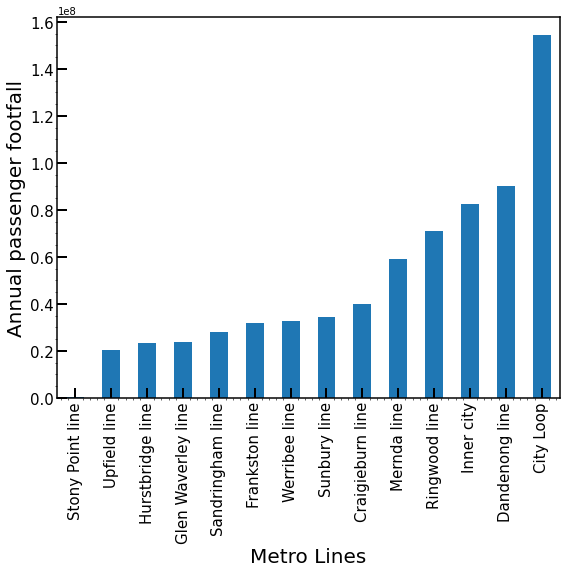

In [116]:
#grouped_lg_df = combinedata.groupby(["Drug Regimen"])
grouped_lg_df2 = grouped_lg_df1.sort_values(['TotalAnnual'])
numbers       = grouped_lg_df2['TotalAnnual'] #.count()
print(numbers)

plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = numbers.plot(kind="bar")
#patron_chart.set_xlabel("Drug Regimen", fontsize=20)
#patron_chart.set_ylabel("total number of rows (Mouse ID/Timepoints)", fontsize=20)
#grouped_lg_df1.sort_values('TotalAnnual',inplace=True)
#grouped_lg_df1.plot(kind='bar',y='TotalAnnual',x='allvarlist',color='r')
#
#plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
#plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xlabel("Metro Lines", fontsize=20)
plt.ylabel("Annual passenger footfall", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.show()

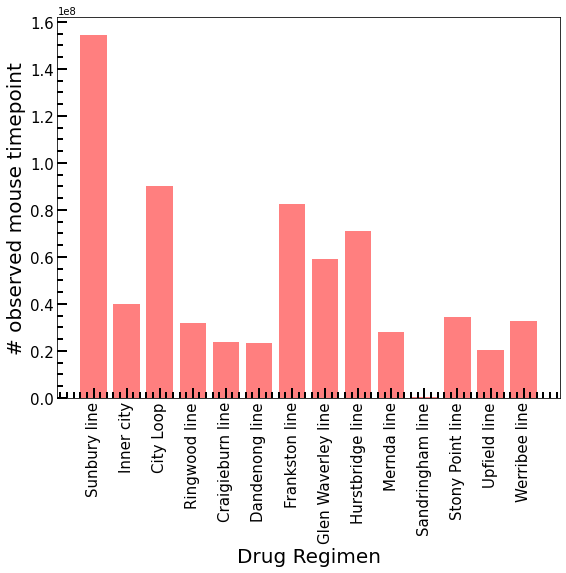

In [104]:
set7   = set5.drop_duplicates(subset=['Line name '], keep='first')
Regimen        = set7["Line name "]
numberc        = grouped_lg_df1['TotalAnnual']
#print(Regimen, numberc)

tick_locations = [value for value in Regimen]
#print(tick_locations)

plt.figure(figsize=(9,7))
plt.bar(Regimen, numberc, color='r', alpha=0.5, align="center")
plt.xticks()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.ylabel("# observed mouse timepoint", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.xticks(tick_locations, Regimen, rotation="vertical")
plt.show()


In [117]:
grouped_lg_df = set5.groupby(["City council"]).sum()
grouped_lg_df.head(15)

,_id,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
City council,,,,,,,,,,,,,,,,,,,,,
Banyule C,1250.0,199595.0,-377.377167,1450.795192,133.921102,16823150.0,26600.0,13450.0,59200.0,49850.0,...,10250.0,11000.0,7600.0,6050.0,4800.0,1050.0,5050.0,1950.0,2700.0,550.0
Bayside C,982.0,211520.0,-341.442999,1305.176382,127.648592,19655550.0,28450.0,13250.0,63400.0,70800.0,...,12150.0,12100.0,11800.0,9000.0,6500.0,850.0,5550.0,2500.0,2700.0,650.0
Boroondara C,558.0,258341.0,-491.859994,1885.858954,117.309118,26341800.0,31350.0,33400.0,94000.0,74000.0,...,18550.0,19750.0,14200.0,9300.0,7650.0,900.0,6450.0,4550.0,6900.0,1500.0
Brimbank C,1007.0,120031.0,-226.498969,868.835124,97.249483,19624650.0,29200.0,10750.0,66650.0,60750.0,...,12200.0,12600.0,10800.0,6750.0,5150.0,1450.0,5900.0,2950.0,2000.0,400.0
Cardinia S,359.0,105437.0,-152.268882,581.701231,195.260988,5640200.0,9100.0,3100.0,20550.0,14150.0,...,6450.0,6650.0,5400.0,3050.0,2250.0,1050.0,3250.0,1300.0,900.0,250.0
Casey C,480.0,145218.0,-228.321837,871.712858,230.540281,14640650.0,21750.0,8000.0,52900.0,38050.0,...,10800.0,11350.0,8450.0,5200.0,3950.0,2100.0,4750.0,2450.0,1750.0,350.0
Darebin C,2145.0,279843.0,-528.516529,2030.071358,116.550232,22618650.0,33100.0,16400.0,75850.0,76200.0,...,16200.0,16750.0,13850.0,10250.0,7950.0,1350.0,6700.0,3650.0,4250.0,1050.0
Frankston C,88.0,79404.0,-152.520787,580.529222,150.378335,6626350.0,6950.0,4300.0,21100.0,26250.0,...,4450.0,4600.0,4000.0,3750.0,2650.0,800.0,1350.0,1300.0,1050.0,300.0
Glen Eira C,851.0,159507.0,-303.181133,1160.285620,86.881896,24589800.0,31150.0,21350.0,82600.0,91750.0,...,17950.0,19400.0,12350.0,12550.0,10400.0,850.0,7000.0,4450.0,5550.0,1650.0


In [118]:
grouped_lg_df.sort_values(['TotalAnnual'])

,_id,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
City council,,,,,,,,,,,,,,,,,,,,,
Mornington Peninsula S,36.0,158644.0,-306.416640,1161.502661,457.475067,270050.0,2000.0,2000.0,2000.0,4200.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Nillumbik S,456.0,59967.0,-112.976664,435.532138,76.888008,1676350.0,3050.0,1100.0,5900.0,5450.0,...,550.0,600.0,450.0,400.0,350.0,150.0,350.0,150.0,150.0,150.0
Cardinia S,359.0,105437.0,-152.268882,581.701231,195.260988,5640200.0,9100.0,3100.0,20550.0,14150.0,...,6450.0,6650.0,5400.0,3050.0,2250.0,1050.0,3250.0,1300.0,900.0,250.0
Knox C,154.0,79474.0,-151.476552,581.155303,115.539810,6133700.0,10350.0,3000.0,21150.0,17550.0,...,3500.0,3600.0,3400.0,2050.0,1500.0,450.0,1650.0,750.0,550.0,200.0
Yarra Ranges S,141.0,99288.0,-189.261178,726.689732,168.165424,6223600.0,8850.0,3750.0,20750.0,20600.0,...,3600.0,3650.0,3400.0,2400.0,1750.0,550.0,1350.0,800.0,750.0,250.0
Frankston C,88.0,79404.0,-152.520787,580.529222,150.378335,6626350.0,6950.0,4300.0,21100.0,26250.0,...,4450.0,4600.0,4000.0,3750.0,2650.0,800.0,1350.0,1300.0,1050.0,300.0
Moreland C,576.0,60099.0,-113.153242,434.766935,35.551542,6792500.0,10000.0,3800.0,22450.0,23450.0,...,2850.0,2900.0,2550.0,1800.0,1350.0,200.0,1550.0,550.0,450.0,150.0
Port Phillip C,372.0,59868.0,-113.601447,434.980784,17.759139,8839650.0,13100.0,7050.0,29600.0,28650.0,...,5400.0,5550.0,5000.0,3750.0,2750.0,200.0,2300.0,1050.0,1450.0,350.0
Wyndham C,387.0,86311.0,-113.652520,434.109518,72.881473,10784350.0,17400.0,5700.0,37850.0,29400.0,...,6250.0,6550.0,5300.0,3800.0,2750.0,750.0,2750.0,1450.0,1350.0,350.0


City council
Mornington Peninsula S         270050.0
Nillumbik S                   1676350.0
Cardinia S                    5640200.0
Knox C                        6133700.0
Yarra Ranges S                6223600.0
Frankston C                   6626350.0
Moreland C                    6792500.0
Port Phillip C                8839650.0
Wyndham C                    10784350.0
Merri-Bec                    11225550.0
Maroondah C                  13461350.0
Casey C                      14640650.0
Kingston C                   14826050.0
Banyule C                    16823150.0
Hobsons Bay C                17216850.0
Moonee Valley C              17851900.0
Greater Dandenong C          18560600.0
Whitehorse C                 18953400.0
Brimbank C                   19624650.0
Bayside C                    19655550.0
Darebin C                    22618650.0
Stonnington C                23360800.0
Maribyrnong C                23513450.0
Hume C                       23938450.0
Glen Eira C                

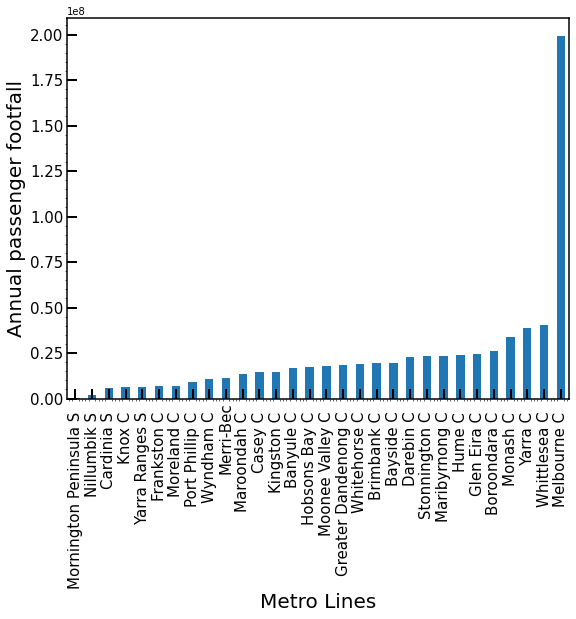

In [119]:
#grouped_lg_df = combinedata.groupby(["Drug Regimen"])
grouped_lg_df3 = grouped_lg_df.sort_values(['TotalAnnual'])
numbers        = grouped_lg_df3['TotalAnnual'] #.count()
print(numbers)

plt.figure(figsize=(9,7))

# Chart our data, give it a title, and label the axes
patron_chart = numbers.plot(kind="bar")
#patron_chart.set_xlabel("Drug Regimen", fontsize=20)
#patron_chart.set_ylabel("total number of rows (Mouse ID/Timepoints)", fontsize=20)
#grouped_lg_df1.sort_values('TotalAnnual',inplace=True)
#grouped_lg_df1.plot(kind='bar',y='TotalAnnual',x='allvarlist',color='r')
#
#plt.tight_layout()
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
#plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xlabel("Metro Lines", fontsize=20)
plt.ylabel("Annual passenger footfall", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
#plt.savefig("Fig1.png")
plt.show()

In [ ]:
grouped_lg_df = set5.groupby(["Line name "]).sum()
grouped_lg_df.head(15)

In [188]:
grouped_lg_df.sort_values(by='Totalfootfall', ascending=False)

,_id,Stop_ID,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,Pax_Saturday1819,Pax_Sunday1819,...,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak
Line name,,,,,,,,,,,,,,,,,,,,,
Sunbury line,3539.0,372388.0,-717.584781,2752.501819,95360500.0,326550.0,336550.0,288100.0,141150.0,106600.0,...,110150.0,82350.0,5250.0,21000.0,39050.0,99700.0,25300.0,223076550.0,96700.0,399850.0
Cranbourne line,2062.0,444140.0,-796.557210,3047.441086,25986600.0,85850.0,91500.0,63500.0,47300.0,35200.0,...,37600.0,28600.0,4100.0,19650.0,15200.0,20650.0,4800.0,87904250.0,93550.0,92850.0
Mernda line,3303.0,482437.0,-678.699711,2610.427175,9487850.0,31650.0,32900.0,27000.0,16550.0,11550.0,...,16000.0,12400.0,2600.0,9950.0,6000.0,6450.0,1350.0,59176700.0,52100.0,81500.0
Alamein line,737.0,258383.0,-491.863350,1885.615677,13245000.0,42750.0,44300.0,37350.0,25750.0,19100.0,...,22300.0,17950.0,1000.0,7600.0,5950.0,11700.0,4200.0,49366300.0,35700.0,75300.0
Craigieburn line,2943.0,365684.0,-565.801406,2173.872114,10864450.0,36300.0,37250.0,32950.0,18400.0,13500.0,...,16150.0,12350.0,2100.0,11150.0,5900.0,6200.0,1500.0,40131250.0,57100.0,28350.0
Belgrave line,1050.0,357998.0,-681.233932,2613.888306,14200450.0,47650.0,49250.0,41300.0,23100.0,17800.0,...,13550.0,10400.0,2300.0,9100.0,4850.0,5400.0,1250.0,39150150.0,57550.0,29900.0
Hurstbridge line,2811.0,439160.0,-830.488892,3191.350505,11170500.0,37450.0,39100.0,32100.0,18750.0,13400.0,...,14400.0,11500.0,1700.0,8900.0,4300.0,7000.0,1600.0,35314750.0,48350.0,33800.0
Frankston line,1044.0,390048.0,-684.159321,2611.482036,10165250.0,33150.0,34900.0,25950.0,19600.0,14650.0,...,13500.0,9700.0,2100.0,8200.0,4800.0,4850.0,1100.0,32045400.0,44000.0,23200.0
Werribee line,1486.0,265918.0,-454.281185,1737.682178,9509650.0,32750.0,33550.0,29200.0,14000.0,9750.0,...,12800.0,9700.0,2200.0,9700.0,4550.0,4400.0,1000.0,30635100.0,49650.0,17850.0


In [145]:
set4 = pd.merge(df, ds, how="left", on=["Stop_name"])

In [149]:
set4.head(10)

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak,Zone,Line name,City council
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,22750.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,53300.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,17300.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,41200.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,68050.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
5,6.0,FY18-19,19832.0,Tyabb,-38.259815,145.186401,5600.0,50.0,50.0,50.0,...,50,50,50,50,17750.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
6,7.0,FY18-19,19833.0,Somerville,-38.225342,145.176245,13150.0,50.0,50.0,50.0,...,50,50,50,50,38800.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
7,8.0,FY18-19,19834.0,Baxter,-38.194043,145.160526,3400.0,50.0,50.0,50.0,...,50,50,50,50,10900.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
8,9.0,FY18-19,19835.0,Glen Iris,-37.859308,145.058225,330100.0,1150.0,1250.0,900.0,...,350,150,250,50,1097600.0,1750.0,1150.0,1,Glen Waverley line,Stonnington C
9,10.0,FY18-19,19836.0,Leawarra,-38.152034,145.139534,10250.0,50.0,50.0,50.0,...,50,50,50,50,30950.0,250.0,250.0,2,Stony Point line,Frankston C


In [150]:
set4.dropna() 

,_id,year1819,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual1819,Pax_weekday1819,Pax_norm_weekday1819,Pax_sch_hol_weekday1819,...,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223,Totalfootfall,TotalAMPeak,TotalPMPeak,Zone,Line name,City council
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,22750.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,53300.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,17300.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,41200.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,68050.0,250.0,250.0,2,Stony Point line,Mornington Peninsula S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,218.0,FY18-19,22180.0,Southern Cross,-37.817936,144.951411,19551450.0,68350.0,70650.0,59550.0,...,2400,6750,23000,4400,55256800.0,10800.0,117050.0,1,Williamstown line,Melbourne C
360,219.0,FY18-19,19918.0,Hughesdale,-37.894881,145.077635,443900.0,1500.0,1650.0,850.0,...,450,400,550,100,5288050.0,3200.0,7050.0,1&2,Cranbourne line,Monash C
361,219.0,FY18-19,19918.0,Hughesdale,-37.894881,145.077635,443900.0,1500.0,1650.0,850.0,...,450,400,550,100,5288050.0,3200.0,7050.0,1&2,Pakenham line,Monash C
363,221.0,FY18-19,52160.0,Hawkstowe,-37.622992,145.097396,193600.0,650.0,700.0,550.0,...,300,200,250,50,11987550.0,3500.0,21500.0,2,Mernda line,Whittlesea C


In [152]:
set3.to_csv('output2.csv')

In [92]:
df.to_csv('output1.csv')

In [11]:
df = pd.concat( 
    map(pd.read_csv, ["Resources/Train1819.csv", "Resources/Train1920.csv"]), ignore_index=True) 
print(df) 

     _id Fin_year  Stop_ID        Stop_name   Stop_lat   Stop_long  \
0      1  FY18-19    19827      Stony Point -38.374235  145.221837   
1      2  FY18-19    19828       Crib Point -38.366123  145.204043   
2      3  FY18-19    19829         Morradoo -38.354033  145.189603   
3      4  FY18-19    19830          Bittern -38.337390  145.178026   
4      5  FY18-19    19831         Hastings -38.305659  145.185980   
..   ...      ...      ...              ...        ...         ...   
439  218  FY19-20    19854  Flinders Street -37.818305  144.966964   
440  219  FY19-20    19908         Richmond -37.824074  144.990164   
441  220  FY19-20    19973  North Melbourne -37.806310  144.941510   
442  221  FY19-20    19979         Jolimont -37.816527  144.984098   
443  222  FY19-20    22180   Southern Cross -37.817936  144.951411   

     Pax_annual  Pax_weekday  Pax_norm_weekday  Pax_sch_hol_weekday  \
0          5400           50                50                   50   
1         17900  

In [4]:
import urllib
url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=eaaeb955-8465-45f2-83bf-a6c7dc17ce14&limit=5&q=title:jones'  
fileobj = urllib.urlopen(url)
print(fileobj.read())

AttributeError: module 'urllib' has no attribute 'urlopen'

In [5]:
subway_map = [
    ['Botanic Gardens', 'Stevens', 'Newton', 'Little India', 'Rochor'],
    ['Newton', 'Novena', 'Toa Payoh', 'Braddell', 'Bishan'],
    ['Dhoby Ghaut', 'Little India', 'Farrer Park', 'Boon Keng']
]

def find_stations_within_distance(subway_map, orig, dist):
    result = []
    to_find_next = [orig]
    while dist > 0:
        now_finding = to_find_next[:]
        to_find_next.clear()
        while now_finding:
            current_station = now_finding.pop()
            for lines in subway_map:
                if current_station in lines:
                    current_idx = lines.index(current_station)
                    pre_idx = current_idx - 1
                    next_idx = current_idx + 1
                    if pre_idx >= 0:
                        pre_station = lines[pre_idx]
                        if pre_station not in result:
                            to_find_next.append(pre_station)
                            result.append(lines[pre_idx])
                    if next_idx < len(lines):
                        next_station = lines[next_idx]
                        if next_station not in result:
                            to_find_next.append(next_station)
                            result.append(next_station)

        dist -= 1
    if orig in result:
        result.remove(orig)
    return result

# Output: ['Stevens', 'Newton']
print(find_stations_within_distance(subway_map, 'Botanic Gardens', 2))
# Output: ['Newton', 'Rochor', 'Dhoby Ghaut', 'Farrer Park']
print(find_stations_within_distance(subway_map, 'Little India', 1))
# Output: ['Little India', 'Newton', 'Rochor', 'Farrer Park', 'Boon Keng', 'Stevens', 'Novena']
print(find_stations_within_distance(subway_map, 'Dhoby Ghaut', 3))


['Stevens', 'Newton']
['Newton', 'Rochor', 'Dhoby Ghaut', 'Farrer Park']
['Little India', 'Newton', 'Rochor', 'Farrer Park', 'Boon Keng', 'Stevens', 'Novena']
